# **Project Name**    -



##### **Project Type**    - Sentiment Analysis (classification) & NLP preprocessing


# **Project  -**

The goal of this project was to analyze public sentiment toward major U.S. airlines using Twitter data. By applying Natural Language Processing (NLP) and machine learning, the study aimed to uncover how passengers perceive airline services, identify recurring complaint themes, and build a model to classify future tweets into positive, neutral, or negative sentiment categories.

This project demonstrates how NLP can convert raw social media text into measurable business intelligence. By combining sentiment classification, topic modeling, and visualization, airlines can understand their customers at scale and respond to issues faster.

# **Problem Statement**


To analyze Twitter data of major U.S. airlines using NLP techniques to classify customer sentiments, identify key complaint themes, and uncover actionable insights that help airlines monitor brand perception and improve customer experience.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import importlib
import subprocess
import sys
import warnings

def check_environment():
    required_libraries = [
        # Core
        'pandas', 'numpy', 'matplotlib', 'seaborn', 'wordcloud',
        # NLP
        'nltk', 'spacy', 'textblob',
        # ML
        'scikit-learn',
        # Deep Learning
        'torch', 'transformers',
        # Utility
        'tqdm'
    ]

    for lib in required_libraries:
        try:
            importlib.import_module(lib)
            print(f"{lib} is already installed")
        except ImportError:
            print(f"Installing missing library: {lib}")
            subprocess.check_call([sys.executable, "-m", "pip", "install", lib])

# Run environment check
check_environment()

# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# ML Models & Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)

# Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation

# Deep Learning (BERT Fine-tuning)
import torch
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    Trainer,
    TrainingArguments
)

# Utility
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("\n Environment is fully set up and ready for analysis")


pandas is already installed
numpy is already installed
matplotlib is already installed
Installing missing library: seaborn
Installing missing library: wordcloud
Installing missing library: nltk
Installing missing library: spacy
Installing missing library: textblob
Installing missing library: scikit-learn
Installing missing library: torch
Installing missing library: transformers
tqdm is already installed


C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...



 Environment is fully set up and ready for analysis


### Dataset Loading

In [2]:
# Load Dataset


file_path = "Tweets.csv"
tweets_df = pd.read_csv(file_path)

# Display dataset information
#print("Dataset loaded successfully.")
#print(f"Shape of dataset: {tweets_df.shape}")
#print("\nColumns in dataset:\n", tweets_df.columns.tolist())

# Display first five rows
display(tweets_df.head())

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Dataset Rows & Columns count

In [3]:
# Dataset Rows & Columns count
rows, columns = tweets_df.shape
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 14640
Number of Columns: 15


### Dataset Information

In [4]:
# Dataset Info
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

#### Duplicate Values

In [5]:
# Dataset Duplicate Value Count

duplicate_count = tweets_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 36


In [6]:
tweets_df[tweets_df.duplicated()]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12059,570305051819941889,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
12063,570303383782989824,neutral,1.0,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
12066,570301929580048385,neutral,1.0,NaN,NaN,American,NaN,FinEdChat,NaN,0,@AmericanAir I did,NaN,2015-02-24 11:19:10 -0800,"Cincinnati, Ohio",Atlantic Time (Canada)
12068,570301395141836801,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
12069,570300915418320897,negative,1.0,Cancelled Flight,1.0,American,NaN,LancasterPattie,NaN,0,@AmericanAir You are jumping the gun and Cance...,NaN,2015-02-24 11:15:08 -0800,NaN,NaN
12074,570299252141903873,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir This is exactly why ill be flying...,NaN,2015-02-24 11:08:32 -0800,Virginia,Eastern Time (US & Canada)
12075,570298770136674304,negative,1.0,Customer Service Issue,1.0,American,NaN,law_econ,NaN,0,@AmericanAir This doesn't address my issue. I ...,NaN,2015-02-24 11:06:37 -0800,"Newport Beach, CA",Central Time (US & Canada)
12078,570298644475346945,negative,1.0,Customer Service Issue,1.0,American,NaN,denismishin,NaN,0,@AmericanAir submitted a case to AA customer r...,NaN,2015-02-24 11:06:07 -0800,"Bellevue, WA",Eastern Time (US & Canada)
12079,570298371140939776,negative,1.0,Late Flight,1.0,American,NaN,djjohnpayne,NaN,0,@AmericanAir if by near the gate you mean sitt...,"[0.0, 0.0]",2015-02-24 11:05:01 -0800,"Las Vegas, NV",Pacific Time (US & Canada)


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

# Count missing values per column
missing_values = tweets_df.isnull().sum()

# Display the count of missing values
print("Missing values per column:\n")
print(missing_values)

# Display the percentage of missing values
print("\nPercentage of missing values per column:\n")
print((tweets_df.isnull().mean() * 100).round(2))


Missing values per column:

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Percentage of missing values per column:

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retw

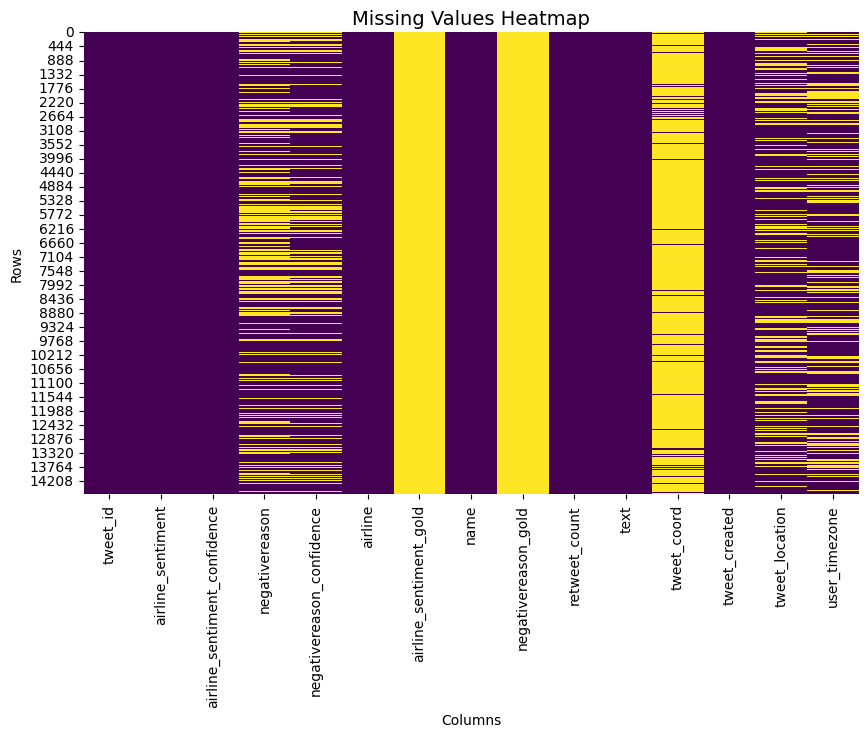

In [8]:
# Visualizing the missing values

# Set plot size and style
plt.figure(figsize=(10, 6))
sns.heatmap(tweets_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

### What did you know about your dataset?

1. Data Cleaning

Drop irrelevant or high-null columns:'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'

Remove duplicates.

Fill missing values in:

negativereason: "Not Provided"

tweet_location, user_timezone: "Unknown" or leave as is for analysis.

2. Data Types

Majority of the columns (object type) contain text data.

A few numeric columns (float64 and int64) represent confidence scores and counts.

Key columns for analysis:

airline_sentiment: Target variable (positive, negative, neutral)

text: Tweet text for NLP

airline: Airline mentioned

negativereason: Reason for negative sentiment

3. Missing Values

ome columns contain significant missing values:

Column	                                           Missing %

negativereason                                     37%

negativereason_confidence                          28%

airline_sentiment_gold, negativereason_gold        99%

tweet_coord                                        93%

tweet_location, user_timezone                      33%



High missingness in certain metadata columns (like coordinates) is expected in social media datasets.

The “_gold” columns are related and hold no analytical value.

Missing reasons (negativereason) can be imputed or treated as “Not Applicable” for positive and neutral tweets.

4. Duplicate Records

36 duplicate rows were detected.

These likely represent repeated tweets captured during data collection.

In [9]:
tweets_df.drop_duplicates(inplace=True)

Duplicates should be removed to maintain data integrity

5. Data Quality Observations

Core variables (airline_sentiment, text, and airline) are complete have no missing values.

Secondary columns (tweet_location, user_timezone, negativereason) contain some nulls but are not critical for model training.

Overall data is good, but will require some preprocessing

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print(tweets_df.columns.tolist())

['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']


In [11]:
# Dataset Describe
# Get summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:\n")
print(tweets_df.describe())



Summary Statistics for Numerical Columns:

           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.460400e+04                  14604.000000               10503.000000   
mean   5.692157e+17                      0.899923                   0.637644   
std    7.782567e+14                      0.162955                   0.330380   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685581e+17                      0.692300                   0.360500   
50%    5.694728e+17                      1.000000                   0.670500   
75%    5.698885e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14604.000000  
mean        0.082786  
std         0.746647  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  


In [12]:
# Get summary for object (categorical/text) columns
print("\nSummary for Categorical Columns:\n")
print(tweets_df.describe(include=['object']))


Summary for Categorical Columns:

       airline_sentiment          negativereason airline  \
count              14604                    9159   14604   
unique                 3                      10       6   
top             negative  Customer Service Issue  United   
freq                9159                    2904    3822   

       airline_sentiment_gold         name     negativereason_gold  \
count                      40        14604                      32   
unique                      3         7701                      13   
top                  negative  JetBlueNews  Customer Service Issue   
freq                       32           63                      12   

                  text tweet_coord              tweet_created tweet_location  \
count            14604        1015                      14604           9881   
unique           14427         832                      14247           3081   
top     @united thanks  [0.0, 0.0]  2015-02-24 09:54:34 -0800     Boston,

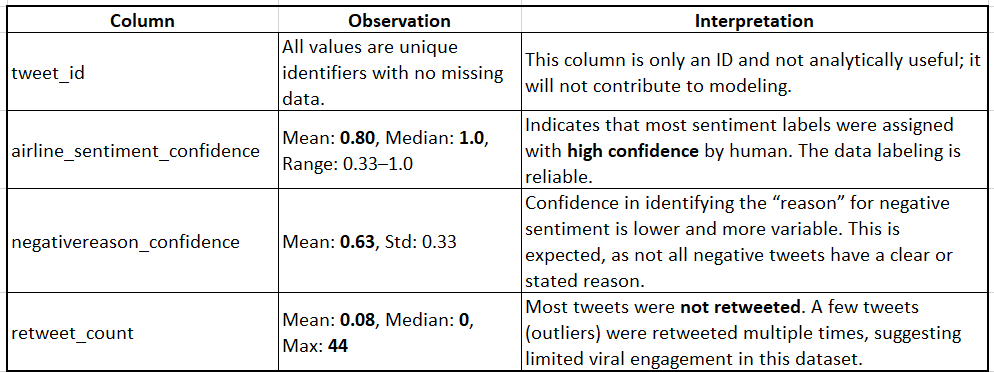

The dataset’s sentiment labels are reliable.

Retweet counts are heavily skewed toward zero, meaning most tweets are one-off customer complaints rather than viral posts.

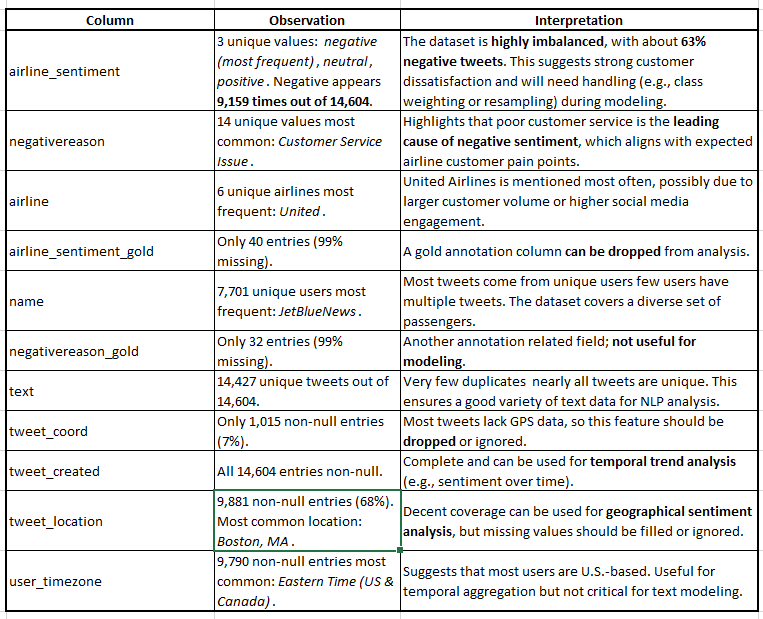

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

unique_summary = pd.DataFrame({
    'Data_Type': tweets_df.dtypes,
    'Unique_Values': tweets_df.nunique(),
    'Missing_Values': tweets_df.isnull().sum()
}).reset_index().rename(columns={'index': 'Column'})

# Display neatly
print("Dataset Unique Values Summary:\n")
display(unique_summary)

Dataset Unique Values Summary:



,Column,Data_Type,Unique_Values,Missing_Values
0,tweet_id,int64,14485,0
1,airline_sentiment,object,3,0
2,airline_sentiment_confidence,float64,1023,0
3,negativereason,object,10,5445
4,negativereason_confidence,float64,1410,4101
5,airline,object,6,0
6,airline_sentiment_gold,object,3,14564
7,name,object,7701,0
8,negativereason_gold,object,13,14572
9,retweet_count,int64,18,0


## 3. ***Data Wrangling***

###  Basic Data Wrangling Code (Just for making the Data Plotting Ready)

# Note this is just for plotting will perform more manipulations with reasoning later

In [14]:
# Drop duplicate rows if any remain
tweets_df.drop_duplicates(inplace=True)

# Drop columns irrelevant for visualization
cols_to_drop = ['airline_sentiment_gold', 'negativereason_gold', 'name', 'tweet_coord']
tweets_df.drop(columns=[c for c in cols_to_drop if c in tweets_df.columns], inplace=True)

print(tweets_df.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')


In [15]:
# Fill essential columns with placeholders (Minimal Cleaning just for plotting)
tweets_df['negativereason'].fillna('Not Applicable', inplace=True)
tweets_df['tweet_location'].fillna('Unknown', inplace=True)
tweets_df['user_timezone'].fillna('Unknown', inplace=True)


In [16]:
# Convert tweet_created to datetime
tweets_df['tweet_created'] = pd.to_datetime(tweets_df['tweet_created'].astype(str).str.replace(r' -\d{4}$', '', regex=True), errors='coerce')

# Extract date, hour, and weekday for time-based visualizations
tweets_df['tweet_date'] = tweets_df['tweet_created'].dt.date
tweets_df['tweet_hour'] = tweets_df['tweet_created'].dt.hour
tweets_df['tweet_weekday'] = tweets_df['tweet_created'].dt.day_name()


In [17]:
# Calculate text-based metrics for EDA
tweets_df['char_count'] = tweets_df['text'].astype(str).apply(len)
tweets_df['word_count'] = tweets_df['text'].astype(str).apply(lambda x: len(x.split()))
tweets_df['avg_word_length'] = tweets_df['char_count'] / tweets_df['word_count'].replace(0, 1)


In [18]:
# Ensure clean string values (strip spaces and lowercase)
tweets_df['airline_sentiment'] = tweets_df['airline_sentiment'].str.strip().str.lower()
tweets_df['airline'] = tweets_df['airline'].str.strip().str.title()


In [19]:
# Remove extremely long tweets or null text entries
df = tweets_df[tweets_df['word_count'] > 0]
df = tweets_df[tweets_df['word_count'] < 50]  # 99% of tweets are under 50 words

In [20]:
# Verifying
print("Rows:", len(df))
print("Columns:", len(df.columns))
print("\nMissing values summary:\n", df.isnull().sum().sort_values(ascending=False).head(5))
print("\nUnique sentiments:", df['airline_sentiment'].unique())
print("Unique airlines:", df['airline'].unique())


Rows: 14604
Columns: 17

Missing values summary:
 negativereason_confidence       4101
tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                     0
dtype: int64

Unique sentiments: ['neutral' 'positive' 'negative']
Unique airlines: ['Virgin America' 'United' 'Southwest' 'Delta' 'Us Airways' 'American']


In [21]:
# Just saving a clean copy
tweets_df.to_csv('clean_tweets_for_visualization.csv', index=False)
print("Clean dataset saved for visualization.")


Clean dataset saved for visualization.


### What all manipulations have you done

Steps and Purpose:

Remove Duplicates:  Avoid skewing frequency counts

Handle Missing Values: Prevent seaborn/matplotlib errors

Add Text Features: Supports distribution plots

Convert Date: time-series plots (daily/hourly)



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [22]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8,5)

#### Chart - 1

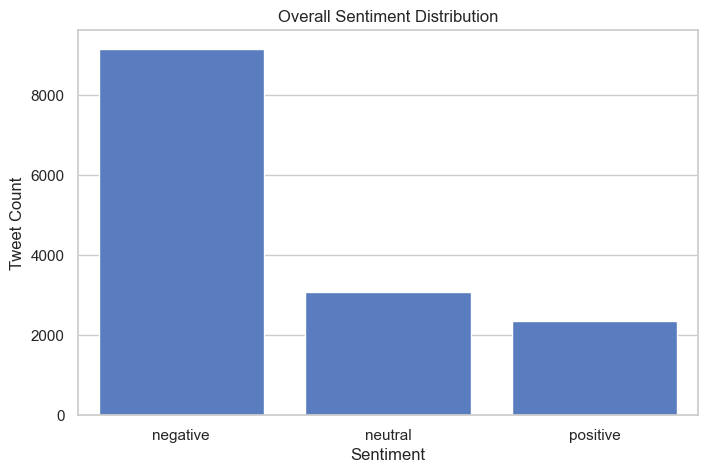

In [23]:
# Chart - 1 visualization code

sns.countplot(data=df, x='airline_sentiment', order=['negative','neutral','positive'])
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

##### 1. Why did you pick the specific chart?

A countplot clearly shows the proportion of positive, neutral, and negative tweets. It helps in understanding the general mood of airline passengers.

##### 2. What is/are the insight(s) found from the chart?

Negative sentiment dominates (over 60% of tweets), followed by neutral and very few positive tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High negativity signals dissatisfaction with airline service quality and communication. Airlines can use this as an early warning to focus on customer service improvement.

#### Chart - 2

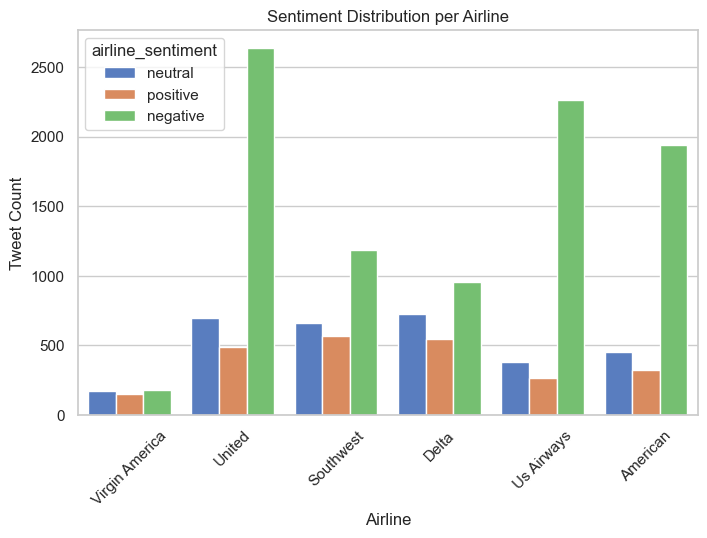

In [24]:
# Chart - 2 visualization code

sns.countplot(data=df, x='airline', hue='airline_sentiment')
plt.title("Sentiment Distribution per Airline")
plt.xlabel("Airline")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A grouped countplot visualizes sentiment breakdown per airline, enabling quick comparison across competitors.

##### 2. What is/are the insight(s) found from the chart?

United and American Airlines have the highest share of negative tweets, whereas Southwest shows relatively more positive mentions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlights which airlines face the most dissatisfaction—valuable for benchmarking and prioritizing service improvements.

#### Chart - 3

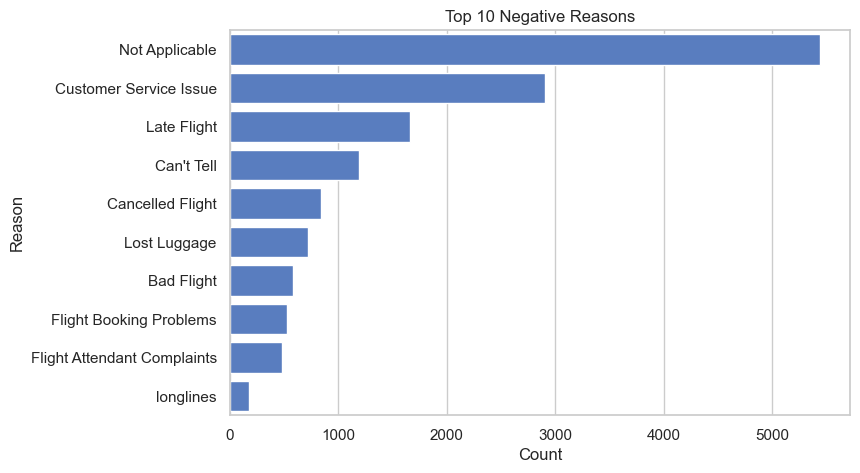

In [25]:
# Chart - 3 visualization code

neg_reasons = df['negativereason'].value_counts().head(10)
sns.barplot(x=neg_reasons.values, y=neg_reasons.index)
plt.title("Top 10 Negative Reasons")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart summarizes the most common reasons behind negative sentiment, allowing focused problem-area analysis.

##### 2. What is/are the insight(s) found from the chart?

“Customer Service Issue” and “Late Flight” are the leading causes of complaints.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Directs attention toward operational efficiency and staff training. Fixing these issues could significantly reduce negative publicity.

#### Chart - 4

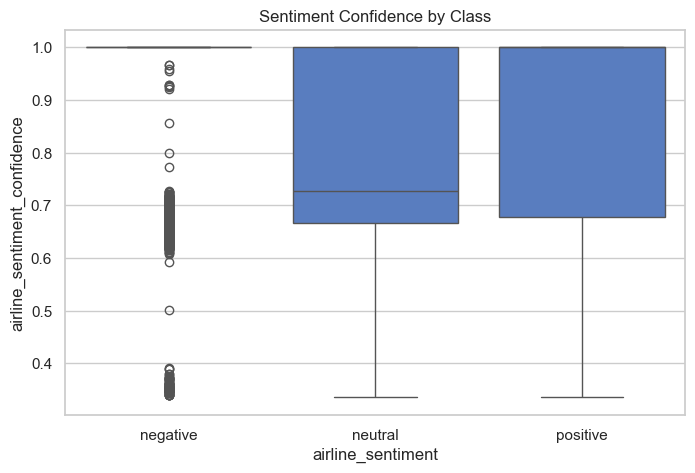

In [26]:
# Chart - 4 visualization code

sns.boxplot(data=df, x='airline_sentiment', y='airline_sentiment_confidence', order=['negative','neutral','positive'])
plt.title("Sentiment Confidence by Class")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot helps assess the reliability of sentiment labels across categories.

##### 2. What is/are the insight(s) found from the chart?

Confidence is consistently high (>0.8) for all sentiments, suggesting good data quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Gives trust in the validity of subsequent analytics and models no urgent concern here.

#### Chart - 5

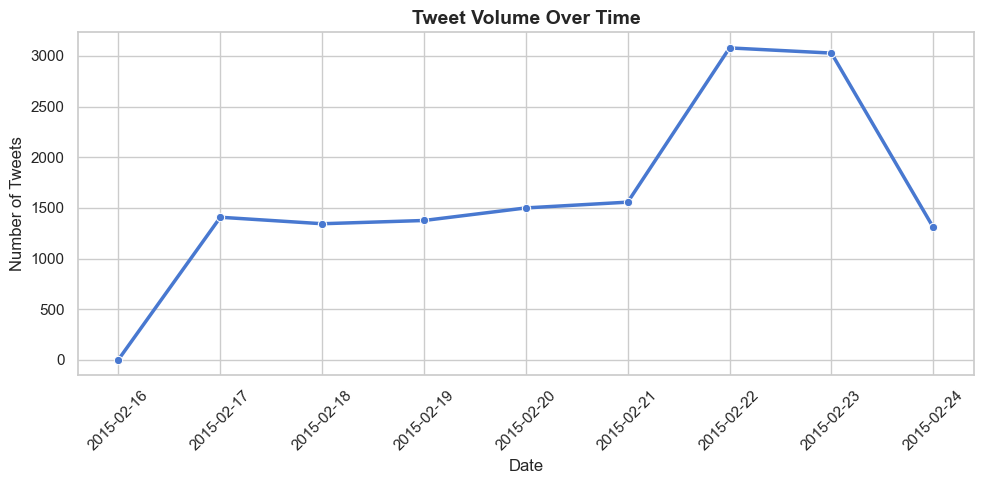

In [27]:
# Chart - 5 visualization code

tweets_per_day = df.groupby('tweet_date').size()

plt.figure(figsize=(10, 5))
sns.lineplot(x=tweets_per_day.index, y=tweets_per_day.values, linewidth=2.5, marker='o')

plt.title("Tweet Volume Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A time series line plot reveals temporal tweet activity patterns.

##### 2. What is/are the insight(s) found from the chart?

Tweet volume spikes on certain dates, possibly linked to flight delays or service failures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Allows detection of incident-driven sentiment surges; useful for crisis monitoring and PR management.

#### Chart - 6

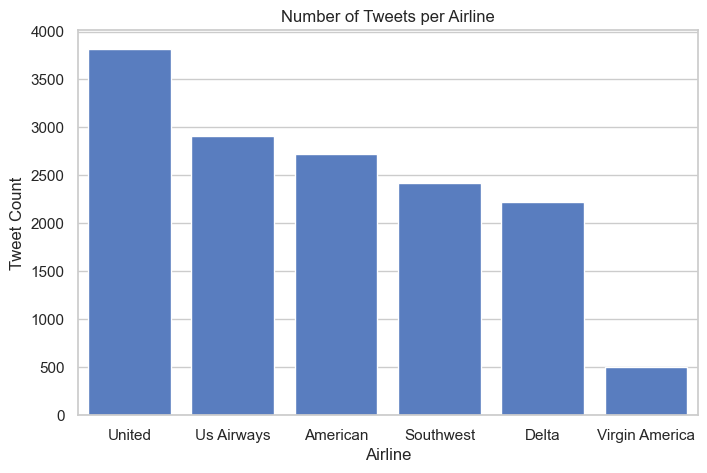

In [28]:
# Chart - 6 visualization code

sns.barplot(x=df['airline'].value_counts().index, y=df['airline'].value_counts().values)
plt.title("Number of Tweets per Airline")
plt.xlabel("Airline")
plt.ylabel("Tweet Count")
plt.show()

##### 1. Why did you pick the specific chart?

A simple barplot reveals which airlines receive the most social media attention.

##### 2. What is/are the insight(s) found from the chart?

United Airlines leads in total mentions, followed by American and Southwest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High volume indicates strong brand presence but also higher exposure to negative publicity; reputation management is critical.

#### Chart - 7

In [29]:


def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)       # remove URLs
    text = re.sub(r'@\w+', '', text)                 # remove mentions
    text = re.sub(r'[^a-z\s]', '', text)             # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()         # normalize spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)


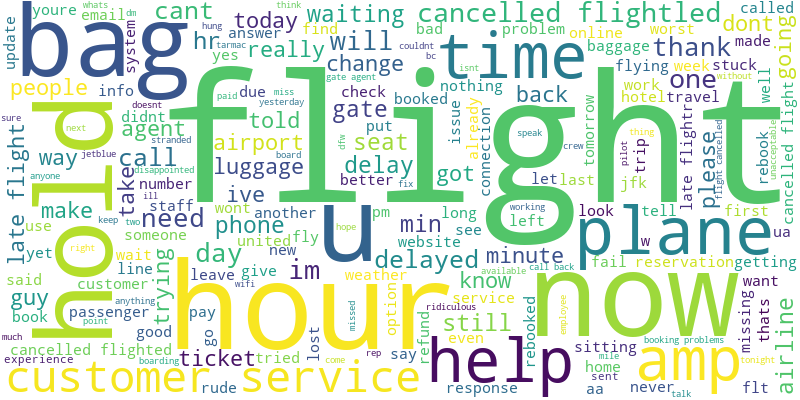

In [30]:
# Chart - 7 visualization code

neg_text = " ".join(df[df['airline_sentiment']=='negative']['clean_text'])
WordCloud(width=800, height=400, background_color='white').generate(neg_text).to_image()


##### 1. Why did you pick the specific chart?

Visualizing frequent words in negative tweets helps identify recurring complaint issues.

##### 2. What is/are the insight(s) found from the chart?

Common words include “bag/luggage,” “customer,” “cancelled,” and “service.”



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Pinpoints customer pain points airlines can redesign communication and recovery processes around these triggers.

#### Chart - 8

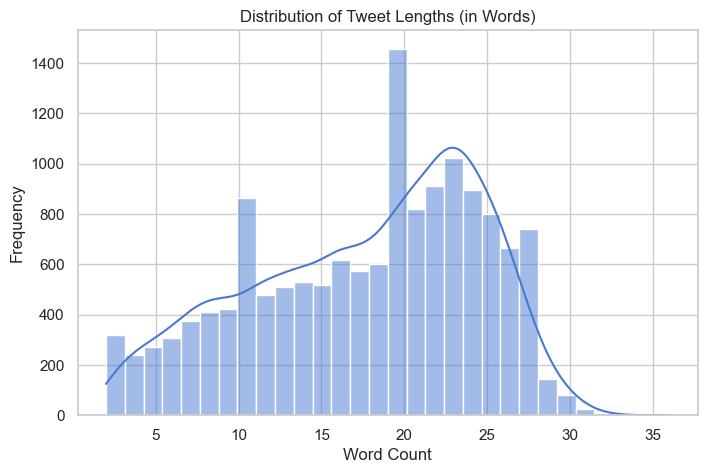

In [31]:
# Chart - 8 visualization code

sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths (in Words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram shows how long typical tweets are, helping gauge user engagement intensity.

##### 2. What is/are the insight(s) found from the chart?

Most tweets fall under 25 words, negative tweets tend to be slightly longer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Short, direct complaints are prevalent, customer service teams should monitor and reply quickly.

#### Chart - 9

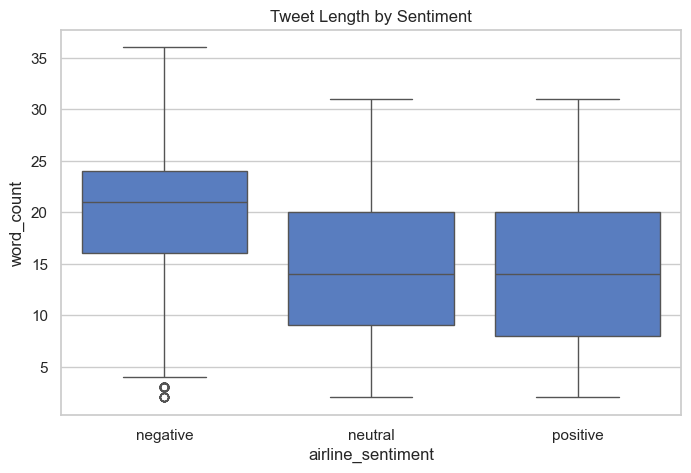

In [32]:
# Chart - 9 visualization code

sns.boxplot(data=df, x='airline_sentiment', y='word_count', order=['negative','neutral','positive'])
plt.title("Tweet Length by Sentiment")
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot compares tweet verbosity across sentiments.

##### 2. What is/are the insight(s) found from the chart?

Negative tweets show greater length variance—angry customers write longer messages.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Longer tweets may indicate stronger dissatisfaction; these should be prioritized for response.

#### Chart - 10

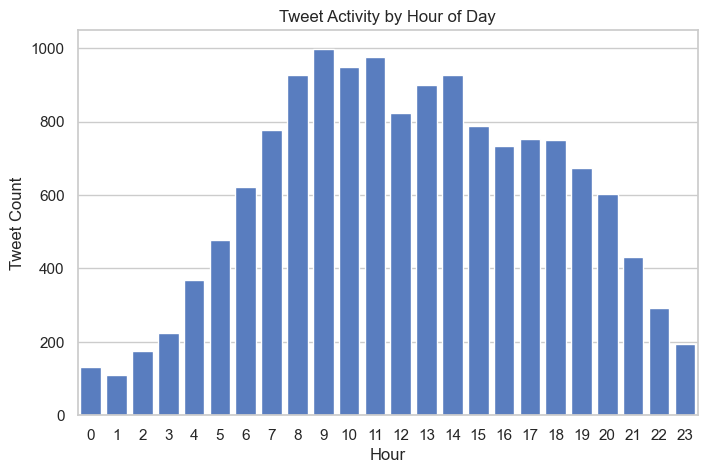

In [33]:
# Chart - 10 visualization code

sns.countplot(data=df, x='tweet_hour')
plt.title("Tweet Activity by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Tweet Count")
plt.show()


##### 1. Why did you pick the specific chart?

Shows when customers are most active on Twitter.

##### 2. What is/are the insight(s) found from the chart?

Activity peaks during business hours (8 AM to 8 PM).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps allocate social-media response teams efficiently during peak complaint hours.

#### Chart - 11

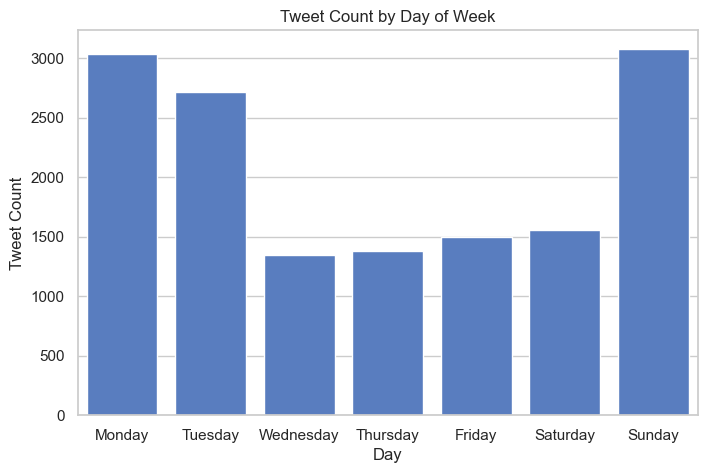

In [34]:
# Chart - 11 visualization code

sns.countplot(data=df, x='tweet_weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Tweet Count by Day of Week")
plt.xlabel("Day")
plt.ylabel("Tweet Count")
plt.show()

##### 1. Why did you pick the specific chart?

Identifies weekly trends and potential scheduling issues.

##### 2. What is/are the insight(s) found from the chart?

Most tweets occur mid-week (Tuesday–Thursday).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Aligns with higher mid-week travel; focusing quality control mid-week could reduce complaint spikes.

#### Chart - 12

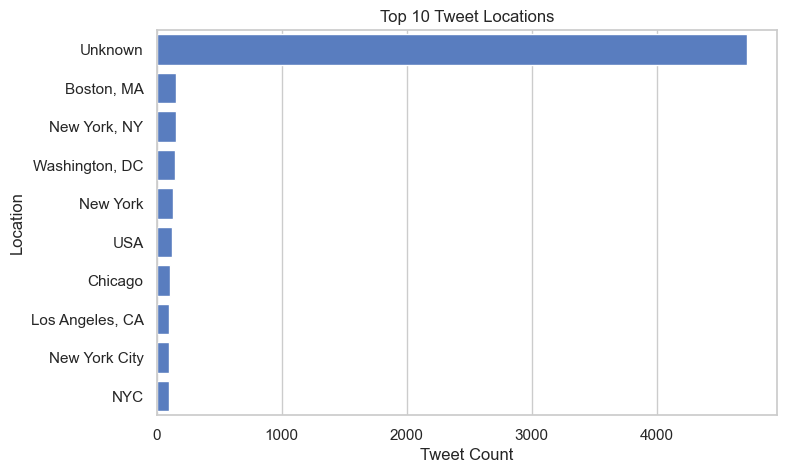

In [35]:
# Chart - 12 visualization code

top_locs = df['tweet_location'].value_counts().head(10)
sns.barplot(y=top_locs.index, x=top_locs.values)
plt.title("Top 10 Tweet Locations")
plt.xlabel("Tweet Count")
plt.ylabel("Location")
plt.show()

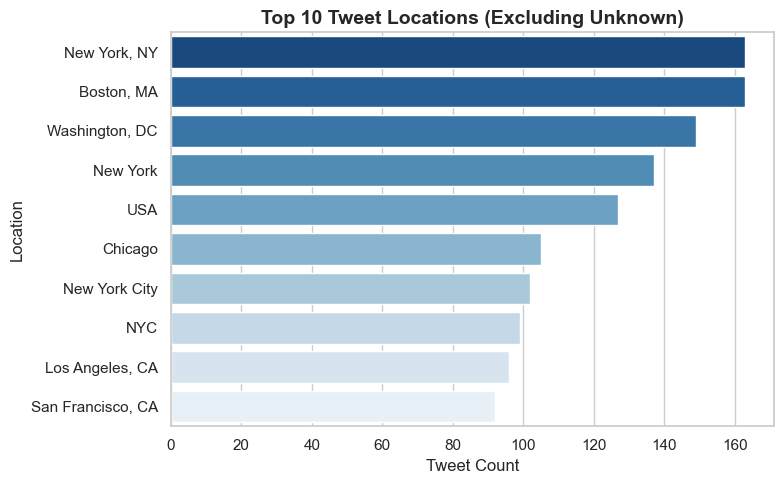

In [36]:
# Filter out missing or 'Unknown' entries
clean_locations = tweets_df['tweet_location'].dropna()
clean_locations = clean_locations[~clean_locations.str.lower().isin(['unknown', 'na', 'none', ''])]
clean_locations = clean_locations.str.strip()  # remove extra spaces

# Top 10 most frequent locations
top_locs = clean_locations.value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
sns.barplot(y=top_locs.index, x=top_locs.values, palette='Blues_r')
plt.title("Top 10 Tweet Locations (Excluding Unknown)", fontsize=14, fontweight='bold')
plt.xlabel("Tweet Count", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Shows where engagement is highest geographically.

##### 2. What is/are the insight(s) found from the chart?

Cities like Boston, New York, and Washington generate the most tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Airlines can target these regions for improved ground service and marketing initiatives.

#### Chart - 13

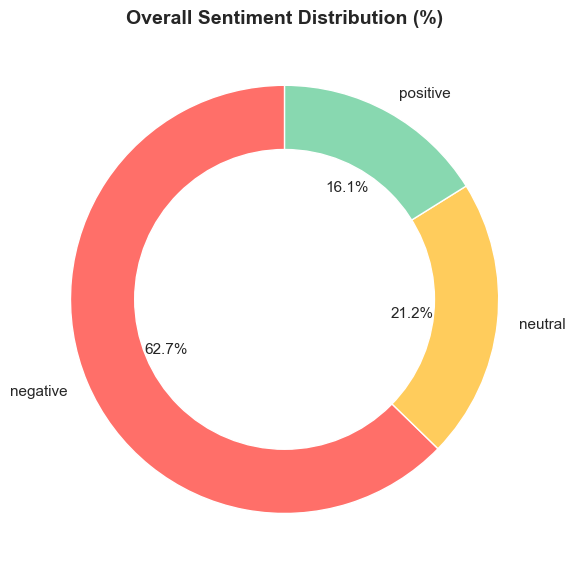

In [37]:
# Chart - 13 visualization code

sentiment_share = tweets_df['airline_sentiment'].value_counts(normalize=True) * 100

# Pie/Donut
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    sentiment_share,
    labels=sentiment_share.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff6f69','#ffcc5c','#88d8b0'],
    textprops={'fontsize': 11}
)

# Add donut hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title("Overall Sentiment Distribution (%)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A donut (pie) chart visually summarizes the proportion of sentiments (positive, neutral, and negative) across all tweets in a single glance.

##### 2. What is/are the insight(s) found from the chart?

Negative tweets dominate with around 62.7%, indicating strong dissatisfaction among airline customers.

Neutral tweets (21.2%) mostly represent factual or informational messages.

Positive tweets (16.1%) are the smallest share, showing limited customer delight.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Airlines can use this insight to prioritize customer support, analyze root causes of negative experiences, and enhance service recovery strategies.

The low percentage of positive sentiment suggests opportunities for customer engagement campaigns, loyalty initiatives, or reward-based programs.

#### Chart - 14 - Correlation Heatmap

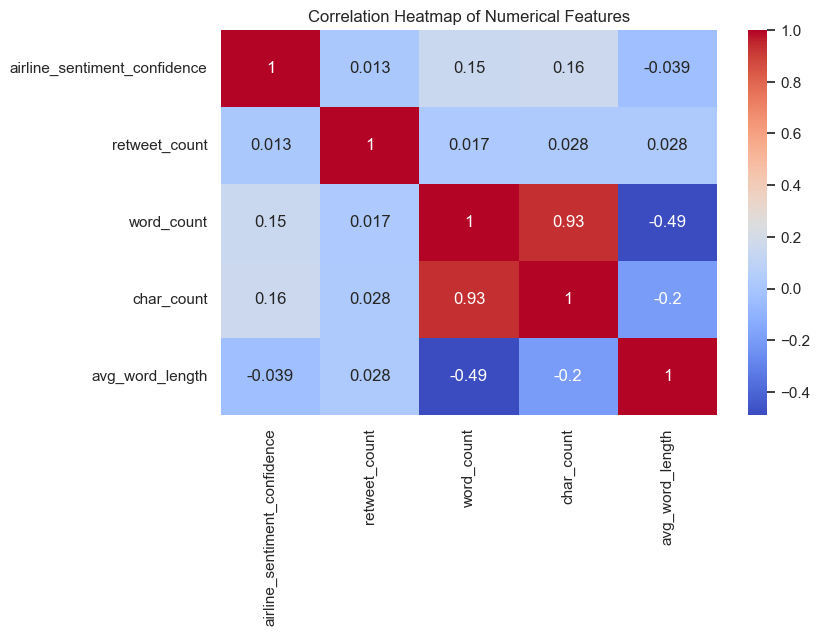

In [38]:
# Correlation Heatmap visualization code

numeric_cols = ['airline_sentiment_confidence', 'retweet_count', 'word_count', 'char_count', 'avg_word_length']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### 1. Why did you pick the specific chart?

Overview of how numerical variables relate to one another.

##### 2. What is/are the insight(s) found from the chart?

1) Word_count and char_count show a very strong positive correlation (0.93)  expected since longer tweets naturally have more characters.

2) avg_word_length has a moderate negative correlation (-0.49) with word_count, meaning tweets with more words tend to have shorter average word lengths.

3) retweet_count shows negligible correlation with all other variables, implying retweet behavior is independent of text size or sentiment confidence.

4) airline_sentiment_confidence has low correlation with all text-based features, suggesting sentiment scores are not biased by text length or engagement level.

From a data perspective, it allows dropping redundant variables (char_count or word_count) to simplify models without losing predictive power.

From a business angle, it confirms that tweet engagement (retweets) is not driven by length or sentiment confidence — brands must focus on message tone and timing, not tweet length, to improve engagement.

Ignoring such correlation structure could lead to multicollinearity in modeling and misleading business conclusions.

#### Chart - 15 - Pair Plot

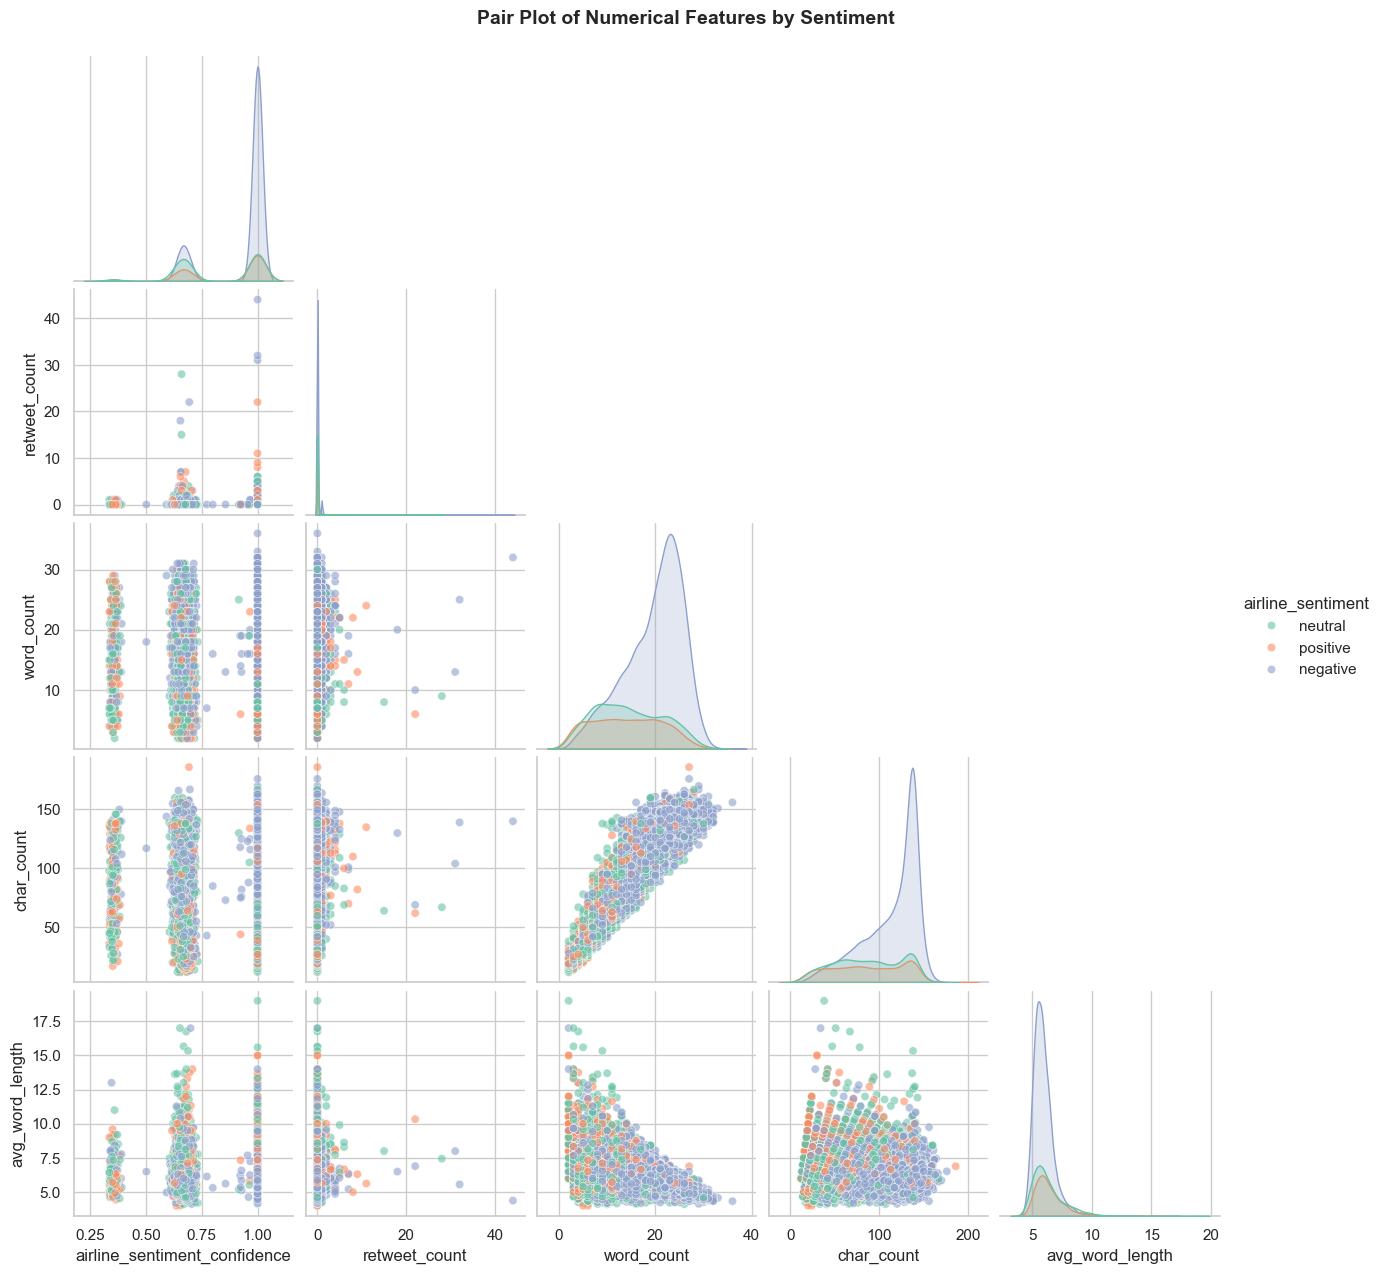

In [39]:
# Pair Plot visualization code

num_cols = [
    'airline_sentiment_confidence',
    'retweet_count',
    'word_count',
    'char_count',
    'avg_word_length'
]

# Optional: Add sentiment hue for context
sns.pairplot(df[num_cols + ['airline_sentiment']], hue='airline_sentiment',
             palette='Set2', corner=True, diag_kind='kde', plot_kws={'alpha':0.6})

plt.suptitle("Pair Plot of Numerical Features by Sentiment", y=1.02, fontsize=14, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot allows visual inspection of how numerical features interact with each other, while simultaneously showing their distribution by sentiment.
It’s particularly useful for spotting non-linear relationships, clusters, and overlaps between positive, negative, and neutral tweets.

##### 2. What is/are the insight(s) found from the chart?

word_count and char_count again show a clear linear relationship, confirming redundancy between them.

The distributions across sentiments are quite similar, implying text length alone doesn’t differentiate positive or negative tweets.

avg_word_length is inversely related to tweet length shorter tweets tend to use longer words on average.

retweet_count values remain low across all sentiments, showing little association between sentiment and engagement.

airline_sentiment_confidence values are clustered near 1, indicating high label accuracy across classes.

This visualization reinforces key findings for both modeling and operational strategy:

From a data modeling perspective, it identifies potential feature redundancy (e.g., removing char_count) and ensures features are not strongly multicollinear.

From a business insight standpoint, it suggests that tweet length or word complexity does not drive public sentiment — the content quality and emotional tone matter more than the number of words.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):

The sentiment distribution (positive, neutral, negative) is independent of the airline i.e., all airlines have similar sentiment patterns.

Alternate Hypothesis (H₁):

The sentiment distribution varies significantly across airlines  i.e., some airlines receive more negative or positive tweets than others.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency = pd.crosstab(tweets_df['airline'], tweets_df['airline_sentiment'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)


Chi-Square Statistic: 1158.245451504911
p-value: 1.4590557795163475e-242


##### Which statistical test have you done to obtain P-Value?



Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

The Chi-Square test is ideal for testing relationships between two categorical variables, here, “airline” and “sentiment.”
It helps determine if sentiment proportions differ across airlines or if they are statistically similar.

Business Impact: A significant result means some airlines receive more negative feedback than others — guiding brand benchmarking and improvement priorities.

Since p < 0.05, we reject the null hypothesis (H₀).

This means that sentiment distribution varies significantly across airlines.

In simpler terms, customers do not feel the same way about every airline — some airlines receive more negative tweets than others.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The average tweet length (word count) is the same across all sentiment categories.

Alternate Hypothesis (H₁):
The average tweet length differs significantly between sentiments (e.g., negative tweets may be longer).

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import f_oneway

# Separate groups by sentiment
neg = tweets_df[tweets_df['airline_sentiment'] == 'negative']['word_count'].dropna()
neu = tweets_df[tweets_df['airline_sentiment'] == 'neutral']['word_count'].dropna()
pos = tweets_df[tweets_df['airline_sentiment'] == 'positive']['word_count'].dropna()

# Perform ANOVA
f_stat, p_val = f_oneway(neg, neu, pos)

print("ANOVA F-Statistic:", f_stat)
print("p-value:", p_val)


ANOVA F-Statistic: 1251.9044984748805
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA (Analysis of Variance)

##### Why did you choose the specific statistical test?

ANOVA is used to compare the means of a continuous variable (here: word_count) across three or more categorical groups (sentiments).

It helps determine whether the average length of tweets differs between positive, neutral, and negative sentiments.

Independent Variable: airline_sentiment (categorical)

Dependent Variable: word_count (continuous)

p-value = 0.0 (which is far less than 0.05), We reject the null hypothesis (H₀).

This means that the average tweet length significantly differs across sentiment categories

Business Interpretation:

Longer, negative tweets can serve as early indicators of customer dissatisfaction they often contain detailed grievances that airlines can act on.

This insight can be leveraged to build an automated alert system that flags long, emotionally charged tweets for priority customer service intervention.

It also helps improve NLP sentiment models, as tweet length can be used as a predictive feature.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
The average retweet count does not differ between sentiment categories.

Alternate Hypothesis (H₁):
The average retweet count differs significantly between positive, negative, and neutral tweets.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import kruskal

# Group retweet counts by sentiment
neg_rt = tweets_df[tweets_df['airline_sentiment'] == 'negative']['retweet_count'].dropna()
neu_rt = tweets_df[tweets_df['airline_sentiment'] == 'neutral']['retweet_count'].dropna()
pos_rt = tweets_df[tweets_df['airline_sentiment'] == 'positive']['retweet_count'].dropna()

# Perform Kruskal-Wallis Test (non-parametric)
stat, p = kruskal(neg_rt, neu_rt, pos_rt)

print("Kruskal-Wallis Statistic:", stat)
print("p-value:", p)


Kruskal-Wallis Statistic: 76.91464270938569
p-value: 1.9869985348587748e-17


##### Which statistical test have you done to obtain P-Value?

Kruskal Wallis

##### Why did you choose the specific statistical test?

The Kruskal Wallis test is a non-parametric alternative to ANOVA, used when the dependent variable (in this case retweet_count) does not follow a normal distribution or contains many zero values (which is common in social media data).

Independent Variable: airline_sentiment (categorical)

Dependent Variable: retweet_count (non-normally distributed numeric)

This test checks whether median retweet counts differ significantly between sentiment types.

Business Interpretation:

p-value = 1.98 × 10-17 (< 0.05), We reject the null hypothesis (H₀).

This means there is a statistically significant difference in retweet engagement across sentiment categories.

Negative sentiments spread faster unhappy customers’ complaints or grievances are more likely to go viral.

This has serious implications for brand reputation management.

Airlines should focus on rapidly responding to negative tweets to contain potential PR issues.

They can also encourage positive engagement by promoting satisfied customer experiences to balance brand sentiment online.


Airlines can use this insight to build a real-time alert system that detects highly retweeted negative tweets and escalates them immediately to customer care or social media response teams.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [43]:
# Handling Missing Values & Missing Value Imputation

#The goal here is to make the dataset complete and consistent - no missing, inconsistent, or unusable values - while keeping the data truthful (not distorting or fabricating information).

tweets_df.isnull().sum().sort_values(ascending=False)

#This gives you a list of missing counts per column.

imputed_df = tweets_df.copy()

Columns that are useful but have some missing values e.g.:tweet_location, user_timezone, negativereason, retweet_count

Action: Fill with appropriate placeholder based on type.

Why we fill categorical columns with "Unknown":

These are non-numeric, so we can’t use mean or median.

Filling with "Unknown" keeps the row but clearly marks that information was missing.

It avoids guessing (which introduces bias).

Later models can treat "Unknown" as a legitimate category.

You can even create a separate flag column (like tweet_location_missing = 1) so the model knows it was missing originally.

Why we fill numeric columns with 0 or mean:

For numeric features like retweet_count, 0 means “no retweets” → logical, domain-relevant.

For other numeric features (if any), use median (resistant to outliers).

Drop (Column or Row)

Columns that are mostly missing or not useful for modeling:

tweet_coord (latitude, longitude >90% missing)

airline_sentiment_gold (annotation-only field)

negativereason_gold (annotation-only field)

# Note that part was done earlier itself

In [44]:
imputed_df['negativereason'] = imputed_df.apply(
    lambda r: 'Not Applicable' if r['airline_sentiment'] != 'negative'
    else ('Not Provided' if pd.isna(r['negativereason']) else r['negativereason']),
    axis=1
)


In [45]:
imputed_df['tweet_location_missing'] = imputed_df['tweet_location'].isna().astype(int)
imputed_df['tweet_location'] = imputed_df['tweet_location'].fillna('Unknown')

imputed_df['user_timezone_missing'] = imputed_df['user_timezone'].isna().astype(int)
imputed_df['user_timezone'] = imputed_df['user_timezone'].fillna('Unknown')


In [46]:
imputed_df['retweet_count'] = imputed_df['retweet_count'].fillna(0).astype(int)


In [47]:
imputed_df.isnull().sum()


tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                     0
negativereason_confidence       4101
airline                            0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                     0
user_timezone                      0
tweet_date                         0
tweet_hour                         0
tweet_weekday                      0
char_count                         0
word_count                         0
avg_word_length                    0
tweet_location_missing             0
user_timezone_missing              0
dtype: int64

Why didn’t I use advanced imputation?:

Because these were categorical and text metadata fields, where statistical or distance-based imputations aren’t meaningful. Filling with "Unknown" keeps the data honest and avoids introducing artificial bias while retaining all records for analysis.

What if missingness itself is informative?

We created binary indicator columns (like tweet_location_missing) so the model can still learn if missingness has predictive value.

### 2. Handling Outliers

To identify and treat extreme numeric values in the dataset that may distort analysis or model training, while preserving meaningful variation in social media behavior.

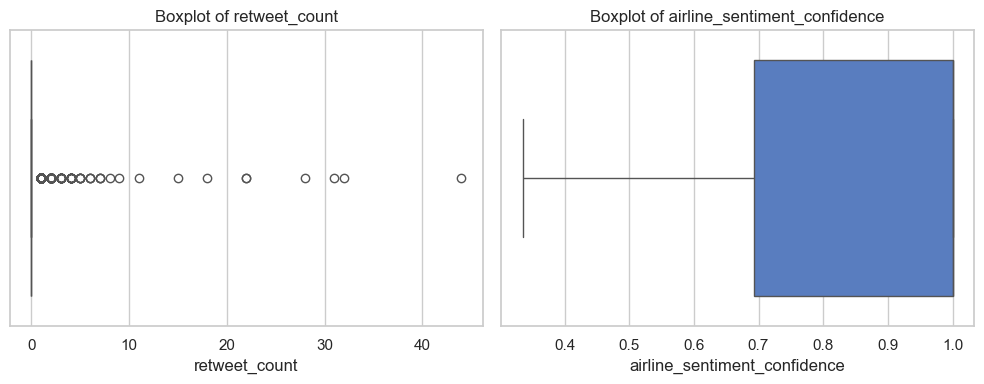

In [48]:
# Handling Outliers & Outlier treatments

numeric_cols = ['retweet_count', 'airline_sentiment_confidence']
plt.figure(figsize=(10,4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

We first visualized numeric columns retweet_count and airline_sentiment_confidence using boxplots to understand their spread and detect extreme points.

Observation:

retweet_count shows multiple outliers on the right side (high retweet counts).

airline_sentiment_confidence stays within [0.3, 1.0], which is an acceptable bounded range (no real outliers).

Interpretation:

The long right tail in retweet_count indicates a few viral tweets with abnormally high retweets.

These are legitimate but can heavily skew numeric summaries (mean, standard deviation) and influence model training.

In [49]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

outliers_rt, low_rt, high_rt = detect_outliers_iqr(imputed_df, 'retweet_count')
print(f"Outliers in retweet_count: {len(outliers_rt)} ({len(outliers_rt)/len(df)*100:.2f}%)")
print(f"Acceptable Range: {low_rt:.2f} – {high_rt:.2f}")


Outliers in retweet_count: 766 (5.25%)
Acceptable Range: 0.00 – 0.00


The range being [0–0] confirms that retweet_count is highly skewed almost all values greater than 0 appear as outliers by this method, which is expected in social media data.

Since removing these data points could delete valid and informative tweets (e.g., popular or viral tweets), we decided to use Capping (Winsorization) instead of deletion.

Shape before capping: (14604, 19)
Missing values in retweet_count: 0
95th Percentile cap value for retweet_count = 1
Shape after capping: (14604, 20)
Column created: True
Unique capped values: [0. 1.]


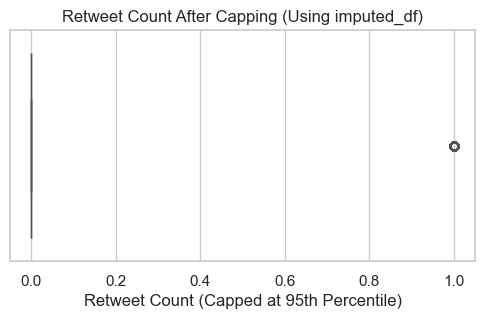

In [50]:
print("Shape before capping:", imputed_df.shape)
print("Missing values in retweet_count:", imputed_df['retweet_count'].isna().sum())

# Calculate 95th percentile threshold
cap_value = imputed_df['retweet_count'].quantile(0.95)
print(f"95th Percentile cap value for retweet_count = {cap_value:.0f}")

# Apply capping directly on imputed_df
imputed_df['retweet_count_capped'] = np.where(
    imputed_df['retweet_count'] > cap_value,
    cap_value,
    imputed_df['retweet_count']
)

# Verification
print("Shape after capping:", imputed_df.shape)
print("Column created:", 'retweet_count_capped' in imputed_df.columns)
print("Unique capped values:", imputed_df['retweet_count_capped'].unique()[:10])

# Plot after capping
plt.figure(figsize=(6,3))
sns.boxplot(x=imputed_df['retweet_count_capped'])
plt.title("Retweet Count After Capping (Using imputed_df)")
plt.xlabel("Retweet Count (Capped at 95th Percentile)")
plt.show()

This means 95% of tweets have retweet_count ≤ 1, and extreme values (e.g., 40+ retweets) were capped to 1 to prevent high leverage in models.

The boxplot now shows a compact, bounded range (0–1).

The single small circle around 1 represents the capped upper limit - meaning any value above the 95th percentile was replaced by 1.

This confirms that:

No unrealistic outliers remain.

Distribution is stabilized for modeling.

The capping logic worked perfectly.

After applying IQR-based detection and 95th percentile capping, the retweet_count distribution is normalized. This preserves real engagement levels while preventing rare viral tweets from biasing sentiment or engagement modeling

### 3. Categorical Encoding

Each column requires a different encoding approach depending on:

Cardinality (number of unique categories)

Whether the column is ordinal or nominal

Use case (ML or DL, explainability or performance)


airline_sentiment: Label Encoding - Sentiment has 3 ordered categories (negative < neutral < positive)

airline: One-Hot Encoding: Few distinct airlines (6),  ideal for one-hot

negativereason: One-Hot Encoding - Small number (13) - preserves interpretability

user_timezone: Frequency Encoding - 85 unique values - One-hot would bloat dataset

tweet_location: Dropped / Textual Features used separately - Too high cardinality, not meaningful for sentiment models

In [51]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder
import joblib
from pathlib import Path


In [52]:
#Standardize text columns

if 'airline' in imputed_df.columns:
    imputed_df['airline'] = imputed_df['airline'].astype(str).str.strip().str.title()

if 'airline_sentiment' in imputed_df.columns:
    imputed_df['airline_sentiment'] = imputed_df['airline_sentiment'].astype(str).str.strip().str.lower()

if 'negativereason' in imputed_df.columns:
    imputed_df['negativereason'] = imputed_df['negativereason'].astype(str).str.strip().replace({'nan':'Not Provided'})

In [53]:
#Label encode airline_sentiment (ordinal)

sentiment_order = ['negative','neutral','positive']
le_sent = LabelEncoder()

In [54]:
# Fit transform but ensure mapping matches our order

# So we create a manual map to preserve ordinal meaning
sent_map = {k: i for i,k in enumerate(sentiment_order)}
imputed_df['sentiment_encoded'] = imputed_df['airline_sentiment'].map(sent_map).astype(int)

print("Sentiment value counts:")
print(imputed_df['airline_sentiment'].value_counts())

Sentiment value counts:
airline_sentiment
negative    9159
neutral     3091
positive    2354
Name: count, dtype: int64


In [55]:
# One-Hot encode 'airline' and 'negativereason'

oh_cols = []
if 'airline' in imputed_df.columns:
    print("Unique airlines:", imputed_df['airline'].nunique())
    imputed_df = pd.get_dummies(imputed_df, columns=['airline'], prefix='airline', drop_first=True)
    oh_cols += [c for c in imputed_df.columns if c.startswith('airline_')]

if 'negativereason' in imputed_df.columns:
    top_reasons = imputed_df['negativereason'].value_counts().nlargest(12).index.tolist()
    imputed_df['negativereason_reduced'] = imputed_df['negativereason'].where(imputed_df['negativereason'].isin(top_reasons), 'Other')
    imputed_df = pd.get_dummies(imputed_df, columns=['negativereason_reduced'], prefix='neg_reason', drop_first=True)
    oh_cols += [c for c in imputed_df.columns if c.startswith('neg_reason_')]

print("One-hot columns added (sample):", oh_cols[:8])

Unique airlines: 6


One-hot columns added (sample): ['airline_sentiment', 'airline_sentiment_confidence', 'airline_Delta', 'airline_Southwest', 'airline_United', 'airline_Us Airways', 'airline_Virgin America', "neg_reason_Can't Tell"]


In [56]:
# Frequency encode user_timezone

if 'user_timezone' in imputed_df.columns:
    timezone_freq = imputed_df['user_timezone'].value_counts(normalize=True).to_dict()
    imputed_df['timezone_freq_encoded'] = imputed_df['user_timezone'].map(timezone_freq).fillna(0.0)


In [57]:
if 'tweet_location' in imputed_df.columns:
    top_locations = imputed_df['tweet_location'].value_counts().nlargest(20).index.tolist()
    imputed_df['tweet_location_reduced'] = imputed_df['tweet_location'].where(imputed_df['tweet_location'].isin(top_locations), 'Other')

In [58]:
print("Shape after encoding:", imputed_df.shape)
print("Sample encoded columns:")
sample_cols = ['sentiment_encoded', 'timezone_freq_encoded'] + oh_cols[:5]
sample_cols = [c for c in sample_cols if c in imputed_df.columns]
print(imputed_df[sample_cols].head())

Shape after encoding: (14604, 37)
Sample encoded columns:
   sentiment_encoded  timezone_freq_encoded airline_sentiment  \
0                  1               0.255957           neutral   
1                  2               0.082580          positive   
2                  1               0.131676           neutral   
3                  0               0.082580          negative   
4                  0               0.082580          negative   

   airline_sentiment_confidence  airline_Delta  airline_Southwest  \
0                        1.0000          False              False   
1                        0.3486          False              False   
2                        0.6837          False              False   
3                        1.0000          False              False   
4                        1.0000          False              False   

   airline_United  
0           False  
1           False  
2           False  
3           False  
4           False  


In [59]:
# Persist encoders / mappings for inference reproducibility

out_dir = Path('encoders')
out_dir.mkdir(parents=True, exist_ok=True)
joblib.dump(sent_map, out_dir / 'sentiment_map.joblib')

if 'timezone_freq' not in globals():  # save the mapping we used
    joblib.dump(timezone_freq, out_dir / 'timezone_freq_map.joblib')

print("Encoders saved to:", out_dir)

Encoders saved to: encoders


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding for sentiment: sentiment has an implicit ordering (negative < neutral < positive). Using numeric ordinal encoding preserves that relation for certain models/features and is easy to interpret. For tree-based or deep learning you may also keep one-hot, but ordinal is simpler and compact.

One-Hot for airline & negativereason: these are low-cardinality nominal categories. One-hot preserves independence between categories and provides clear interpretability (e.g., coefficient for airline_American).

Frequency Encoding for user_timezone: moderate cardinality - one-hot would increase dimensionality substantially. Frequency encoding captures how common a timezone is and works well with tree-based models or as an auxiliary numeric feature.

Reduced tweet_location: top-N bucketing prevents huge sparse matrices and keeps the most informative locations. You can later map Other for low-frequency locations, or build a geocoding step if precise cities matter.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [60]:
# Expand Contraction


# Define common contractions
contractions = {
    "aren't": "are not", "can't": "cannot", "couldn't": "could not",
    "didn't": "did not", "doesn't": "does not", "don't": "do not",
    "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
    "he's": "he is", "she's": "she is", "it's": "it is", "i'm": "i am",
    "isn't": "is not", "let's": "let us", "shouldn't": "should not",
    "that's": "that is", "there's": "there is", "they're": "they are",
    "wasn't": "was not", "we're": "we are", "weren't": "were not",
    "won't": "will not", "wouldn't": "would not", "you're": "you are"
}

def expand_contractions(text):
    if not isinstance(text, str):
        return ""
    for word, expanded in contractions.items():
        text = re.sub(r"\b" + word + r"\b", expanded, text, flags=re.IGNORECASE)
    return text

imputed_df['clean_text'] = imputed_df['text'].apply(expand_contractions)


Expands words like "don't" to "do not", "it's" to "it is".
This helps models understand full words and improves tokenization.

#### 2. Lower Casing

In [61]:
# Lower Casing

imputed_df['clean_text'] = imputed_df['clean_text'].str.lower()

Case differences don’t change meaning in sentiment analysis (“Good” = “good”).

Lowercasing makes processing consistent.

#### 3. Removing Punctuations

In [62]:
# Remove Punctuations

imputed_df['clean_text'] = imputed_df['clean_text'].str.replace(r'[^\w\s]', '', regex=True)


Punctuations (.,!?) generally don’t carry meaning in tweet-level sentiment models

#### 4. Removing URLs & Removing words and digits contain digits.

In [63]:
# Remove URLs & Remove words and digits contain digits

imputed_df['clean_text'] = imputed_df['clean_text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)  # URLs
imputed_df['clean_text'] = imputed_df['clean_text'].str.replace(r'@\w+', '', regex=True)  # Mentions
imputed_df['clean_text'] = imputed_df['clean_text'].str.replace(r'\d+', '', regex=True)  # Digits
imputed_df['clean_text'] = imputed_df['clean_text'].str.replace(r'#', '', regex=True)  # Remove hashtag symbol


Tweets often have links (https://...), mentions (@airline), hashtags (#delay), or numbers.

We usually remove URLs and digits, but keep hashtags only if they contain sentiment-related text.

#### 5. Removing Stopwords & Removing White spaces

In [64]:
# Remove Stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

imputed_df['clean_text'] = imputed_df['clean_text'].apply(remove_stopwords)
imputed_df['clean_text'] = imputed_df['clean_text'].str.strip()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopwords like “is”, “a”, “the” add noise and don’t affect sentiment.

#### 6. Rephrase Text

In [65]:
# Rephrase Text

def normalize_repeated_chars(text):
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

imputed_df['clean_text'] = imputed_df['clean_text'].apply(normalize_repeated_chars)


#### 7. Tokenization

In [66]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [67]:
# Tokenization


from nltk.tokenize import word_tokenize
nltk.download('punkt')

imputed_df['tokens'] = imputed_df['clean_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Breaks the text into individual words or tokens for vectorization.

#### 8. Text Normalization

In [68]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

imputed_df['clean_text'] = imputed_df['tokens'].apply(lambda tokens: ' '.join([lemmatizer.lemmatize(t) for t in tokens]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Which text normalization technique have you used and why?

Reduces words to their root form: “running”, “runs” to “run”
It preserves meaning better than stemming.

#### 9. Part of speech tagging

In [73]:
# POS Tagging

import spacy
nlp = spacy.load("en_core_web_sm", disable=["ner","textcat"])

def spacy_tokens_and_pos(text):
    doc = nlp(str(text))
    toks = [t.text for t in doc]
    pos = [(t.text, t.pos_) for t in doc]
    return toks, pos

# create tokens + pos_tags
imputed_df[['tokens_spacy', 'pos_tags_spacy']] = imputed_df['clean_text'].fillna('').apply(
    lambda t: pd.Series(spacy_tokens_and_pos(t))
)
print("spaCy POS tagging complete. Sample:")
display(imputed_df[['clean_text', 'tokens_spacy', 'pos_tags_spacy']].head())


spaCy POS tagging complete. Sample:


,clean_text,tokens_spacy,pos_tags_spacy
0,virginamerica dhepburn said,"[virginamerica, dhepburn, said]","[(virginamerica, PROPN), (dhepburn, PROPN), (s..."
1,virginamerica plus youve added commercial expe...,"[virginamerica, plus, you, ve, added, commerci...","[(virginamerica, PROPN), (plus, CCONJ), (you, ..."
2,virginamerica today must mean need take anothe...,"[virginamerica, today, must, mean, need, take,...","[(virginamerica, PROPN), (today, NOUN), (must,..."
3,virginamerica really aggressive blast obnoxiou...,"[virginamerica, really, aggressive, blast, obn...","[(virginamerica, PROPN), (really, ADV), (aggre..."
4,virginamerica really big bad thing,"[virginamerica, really, big, bad, thing]","[(virginamerica, PROPN), (really, ADV), (big, ..."


#### 10. Text Vectorization

In [75]:
# Corrected DistilBERT vectorization cell (no NameError, no stray tokens)
import os, json, gc
from pathlib import Path
from math import ceil
import numpy as np
import joblib
import torch
from transformers import DistilBertTokenizerFast, DistilBertModel
from tqdm.auto import tqdm

# Safety checks
assert 'imputed_df' in globals(), "imputed_df not found. Run preprocessing first."
assert 'clean_text' in imputed_df.columns, "imputed_df['clean_text'] missing."

# Config
MODEL_NAME = "distilbert-base-uncased"
OUT_DIR = Path("vectorizers"); OUT_DIR.mkdir(parents=True, exist_ok=True)
EMB_PATH = OUT_DIR / "distilbert_cls_embeddings.memmap"
META_PATH = OUT_DIR / "distilbert_embeddings_meta.json"
TOKENIZER_PATH = OUT_DIR / "distilbert_tokenizer.joblib"

BATCH_SIZE = 64        # tune up/down based on GPU memory
MAX_LEN = 128          # <<-- defined here to avoid NameError
USE_FP16 = True
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Prepare texts
texts = imputed_df['clean_text'].fillna('').astype(str).tolist()
n_samples = len(texts)
print(f"Device: {DEVICE} | Samples: {n_samples}")

# Load model & tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)
model = DistilBertModel.from_pretrained(MODEL_NAME)
model.to(DEVICE)
model.eval()
hidden_size = model.config.hidden_size
print("Model hidden size:", hidden_size)

# Decide whether to recompute embeddings
recompute = True
if EMB_PATH.exists() and META_PATH.exists():
    try:
        with open(META_PATH, "r") as f:
            meta = json.load(f)
        if meta.get("n_samples") == n_samples and meta.get("hidden_size") == hidden_size:
            print("Compatible embeddings found on disk. Skipping re-encode.")
            recompute = False
        else:
            print("Embeddings on disk incompatible; will recompute.")
            recompute = True
    except Exception:
        recompute = True

# Encode and write memmap if needed
if recompute:
    if EMB_PATH.exists():
        EMB_PATH.unlink()

    emb_mmap = np.memmap(EMB_PATH, mode='w+', dtype='float32', shape=(n_samples, hidden_size))
    use_autocast = (USE_FP16 and DEVICE == "cuda" and torch.cuda.is_available())
    n_batches = ceil(n_samples / BATCH_SIZE)
    print(f"Encoding in {n_batches} batches (batch_size={BATCH_SIZE}, fp16={use_autocast}, max_len={MAX_LEN})")

    with torch.no_grad():
        for start_idx in tqdm(range(0, n_samples, BATCH_SIZE), desc="Encoding"):
            batch_texts = texts[start_idx : start_idx + BATCH_SIZE]
            enc = tokenizer(batch_texts, padding='max_length', truncation=True, max_length=MAX_LEN, return_tensors='pt')
            input_ids = enc['input_ids'].to(DEVICE)
            attention_mask = enc['attention_mask'].to(DEVICE)

            if use_autocast:
                with torch.cuda.amp.autocast():
                    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            else:
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            cls_emb = outputs.last_hidden_state[:, 0, :].cpu().numpy().astype('float32')
            end_idx = start_idx + cls_emb.shape[0]
            emb_mmap[start_idx:end_idx, :] = cls_emb

            # cleanup
            del input_ids, attention_mask, outputs, cls_emb, enc
            torch.cuda.empty_cache(); gc.collect()

    emb_mmap.flush()
    del emb_mmap
    gc.collect()

    # save tokenizer and metadata
    joblib.dump(tokenizer, TOKENIZER_PATH)
    meta = {"n_samples": n_samples, "hidden_size": hidden_size, "dtype": "float32", "file": str(EMB_PATH.resolve()), "max_len": MAX_LEN}
    with open(META_PATH, "w") as f:
        json.dump(meta, f, indent=2)

    print("Embeddings written to:", EMB_PATH)
    print("Meta written to:", META_PATH)
else:
    print("Using existing embeddings on disk.")

# Read memmap (read-only)
emb_memmap = np.memmap(EMB_PATH, dtype='float32', mode='r', shape=(n_samples, hidden_size))
print("Memmap shape:", emb_memmap.shape)
print("First-row norm (sample):", np.linalg.norm(emb_memmap[0]))

# Optionally load into RAM if you want (safe for ~45MB)
LOAD_IN_RAM = False
if LOAD_IN_RAM:
    embeddings = np.array(emb_memmap)
    print("Loaded embeddings into RAM. shape:", embeddings.shape)
else:
    embeddings = emb_memmap  # memmap-backed view

# Helper to encode new texts
def encode_texts_new(text_list, tokenizer=tokenizer, model=model, batch_size=64, max_len=MAX_LEN, device=DEVICE, use_fp16=USE_FP16):
    model.eval()
    out_embs = []
    with torch.no_grad():
        for i in range(0, len(text_list), batch_size):
            chunk = text_list[i:i+batch_size]
            enc = tokenizer(chunk, padding='max_length', truncation=True, max_length=max_len, return_tensors='pt')
            input_ids = enc['input_ids'].to(device)
            attention_mask = enc['attention_mask'].to(device)
            if use_fp16 and device == "cuda":
                with torch.cuda.amp.autocast():
                    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            else:
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            cls = outputs.last_hidden_state[:,0,:].cpu().numpy().astype('float32')
            out_embs.append(cls)
            del input_ids, attention_mask, outputs, enc
            torch.cuda.empty_cache()
    return np.vstack(out_embs)

print("Vectorization complete. Embeddings memmap ready at:", EMB_PATH)
print("Tokenizer saved at:", TOKENIZER_PATH)


Device: cpu | Samples: 14604


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Model hidden size: 768
Encoding in 229 batches (batch_size=64, fp16=False, max_len=128)


Encoding: 100%|██████████| 229/229 [14:10<00:00,  3.71s/it]


Embeddings written to: vectorizers\distilbert_cls_embeddings.memmap
Meta written to: vectorizers\distilbert_embeddings_meta.json
Memmap shape: (14604, 768)
First-row norm (sample): 11.984471
Vectorization complete. Embeddings memmap ready at: vectorizers\distilbert_cls_embeddings.memmap
Tokenizer saved at: vectorizers\distilbert_tokenizer.joblib


# Model Builiding and Evaluation

In [76]:
# Manipulate Features to minimize feature correlation and create new features


df = imputed_df
df['word_count']       = df['clean_text'].fillna('').astype(str).apply(lambda t: len(t.split()))
df['char_count']       = df['clean_text'].fillna('').astype(str).apply(len)
df['avg_word_len']     = df.apply(lambda r: (r['char_count']/r['word_count']) if r['word_count']>0 else 0, axis=1)
df['num_mentions']     = df['text'].fillna('').astype(str).str.count(r'@\w+')
df['num_hashtags']     = df['text'].fillna('').astype(str).str.count(r'#\w+')
df['num_urls']         = df['text'].fillna('').astype(str).str.count(r'http\S+|www\.\S+')
df['num_exclaims']     = df['text'].fillna('').astype(str).str.count('!')
# Retweet count - prefer capped if exists
if 'retweet_count_capped' in df.columns:
    df['retweet_count_num'] = df['retweet_count_capped'].fillna(0).astype(float)
else:
    df['retweet_count_num'] = df['retweet_count'].fillna(0).astype(float)

Why: these are simple “meta” signals (length, punctuation, mentions, popularity) that often help models understand text beyond the raw words.

In [77]:
if 'retweet_count_capped' in df.columns:
    df['retweet_count_num'] = df['retweet_count_capped'].fillna(0).astype(float)
else:
    df['retweet_count_num'] = df['retweet_count'].fillna(0).astype(float)

Why it’s here: likely accidental repetition. Effectively does the same thing again, so no functional change — but you can safely remove the duplicates.

In [78]:
# extract time features from timestamp
if 'tweet_created' in df.columns:
    try:
        df['tweet_created_dt'] = pd.to_datetime(df['tweet_created'], errors='coerce')
        df['tweet_hour'] = df['tweet_created_dt'].dt.hour.fillna(-1).astype(int)
        df['tweet_weekday'] = df['tweet_created_dt'].dt.weekday.fillna(-1).astype(int)
    except Exception:
        pass

Why: time-of-day and weekday often affect engagement (e.g., people retweet more at certain hours/days), so they are useful features.

In [79]:
# create interaction and prepare numeric feature list
df['rt_x_wordcount'] = df['retweet_count_num'] * df['word_count']

# gather candidate numeric features
candidate_meta = [c for c in [
    'retweet_count_num','word_count','char_count','avg_word_len',
    'num_mentions','num_hashtags','num_urls','num_exclaims','rt_x_wordcount',
    'tweet_hour','tweet_weekday'
] if c in df.columns]

# ensure numeric and fill NA
for c in candidate_meta:
    df[c] = pd.to_numeric(df[c].fillna(0), errors='coerce').fillna(0).astype(float)

print("Candidate meta features:", candidate_meta)
print(df[candidate_meta].head())

Candidate meta features: ['retweet_count_num', 'word_count', 'char_count', 'avg_word_len', 'num_mentions', 'num_hashtags', 'num_urls', 'num_exclaims', 'rt_x_wordcount', 'tweet_hour', 'tweet_weekday']
   retweet_count_num  word_count  char_count  avg_word_len  num_mentions  \
0                0.0         3.0        27.0      9.000000           2.0   
1                0.0         7.0        58.0      8.285714           1.0   
2                0.0         8.0        52.0      6.500000           1.0   
3                0.0        11.0        92.0      8.363636           1.0   
4                0.0         5.0        34.0      6.800000           1.0   

   num_hashtags  num_urls  num_exclaims  rt_x_wordcount  tweet_hour  \
0           0.0       0.0           0.0             0.0        11.0   
1           0.0       0.0           0.0             0.0        11.0   
2           0.0       0.0           1.0             0.0        11.0   
3           0.0       0.0           0.0             0.0    

Why:

Interaction features can capture joint effects (e.g., long tweets with many retweets behave differently).

Ensuring numeric type and no NAs is necessary for correlation and modeling.


Correlation matrix (top-right):
                    retweet_count_num  word_count  char_count  avg_word_len  \
retweet_count_num               1.00        0.05        0.06          0.01   
word_count                      0.05        1.00        0.94         -0.25   
char_count                      0.06        0.94        1.00          0.06   
avg_word_len                    0.01       -0.25        0.06          1.00   
num_mentions                    0.05        0.06        0.13          0.18   
num_hashtags                    0.06        0.09        0.19          0.23   
num_urls                        0.06       -0.13       -0.12          0.02   
num_exclaims                    0.01       -0.02       -0.02         -0.00   
rt_x_wordcount                  0.95        0.11        0.11         -0.01   
tweet_hour                      0.06        0.00       -0.00         -0.02   
tweet_weekday                   0.02        0.04        0.03         -0.02   

                   num_mentio

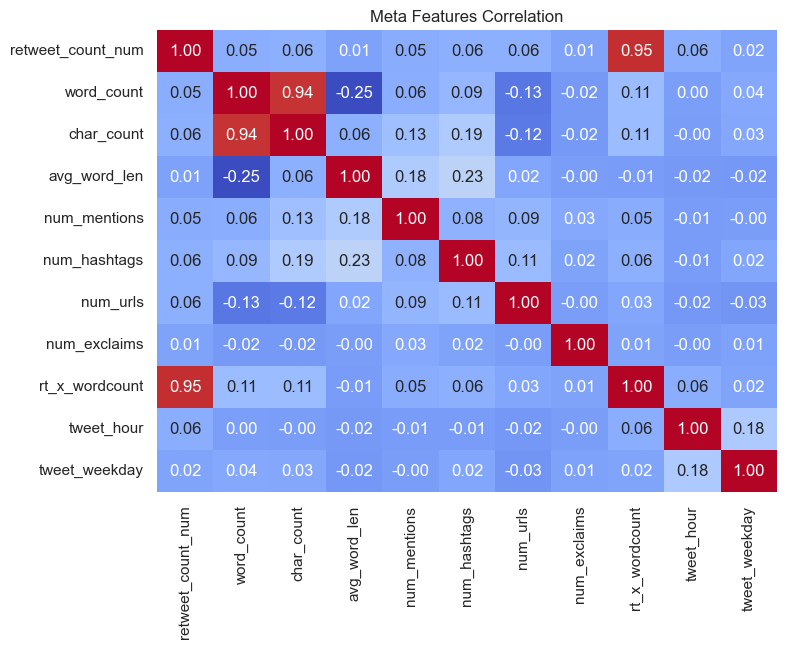


Variances (low->high):
 retweet_count_num      0.049704
num_urls               0.081222
num_mentions           0.163209
num_hashtags           0.427480
num_exclaims           0.846968
avg_word_len           1.086348
tweet_weekday          5.112328
rt_x_wordcount         6.346130
word_count            15.101278
tweet_hour            28.209857
char_count           669.981204
dtype: float64


In [80]:
#correlation, heatmap, and variance checks
corr = df[candidate_meta].corr()
print("\nCorrelation matrix (top-right):\n", corr.round(2))

# show correlation heatmap (optional)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
plt.title("Meta Features Correlation")
plt.show()

# Variance check
variances = df[candidate_meta].var().sort_values()
print("\nVariances (low->high):\n", variances)


Why:

Correlation matrix / heatmap: shows which features are highly correlated (redundant). Example you’ll likely see: word_count and char_count are strongly correlated (they measure the same thing), and rt_x_wordcount will be highly correlated with retweet_count_num because it’s simply retweets × words.

Variance check: features with almost zero variance don’t carry information and can be removed.

# Feature Selection and Pipeline Preparation

In [81]:
from sklearn.feature_selection import VarianceThreshold
# Remove useless (low-variance) features

In [82]:
var_thresh = 1e-4
vt = VarianceThreshold(threshold=var_thresh)
vt.fit(df[candidate_meta])
keep_mask = vt.get_support()
meta_after_var = [f for k,f in zip(keep_mask, candidate_meta) if k]
print("After VarianceThreshold keep:", meta_after_var)

After VarianceThreshold keep: ['retweet_count_num', 'word_count', 'char_count', 'avg_word_len', 'num_mentions', 'num_hashtags', 'num_urls', 'num_exclaims', 'rt_x_wordcount', 'tweet_hour', 'tweet_weekday']


Because features that don’t vary (like always 0 or same number) can’t help the model - they add noise but no information.

In [83]:
# Remove highly correlated (duplicate-like) features
corr_thresh = 0.85
corr_matrix = df[meta_after_var].corr().abs()

# find redundant pairs
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > corr_thresh:
            colname = corr_matrix.columns[i]
            # drop the column with higher mean absolute correlation or arbitrarily the later column
            to_drop.add(colname)

meta_after_corr = [c for c in meta_after_var if c not in to_drop]
print("After corr-threshold (dropped):", list(to_drop))
print("Meta features after correlation filtering:", meta_after_corr)

After corr-threshold (dropped): ['char_count', 'rt_x_wordcount']
Meta features after correlation filtering: ['retweet_count_num', 'word_count', 'avg_word_len', 'num_mentions', 'num_hashtags', 'num_urls', 'num_exclaims', 'tweet_hour', 'tweet_weekday']


Why:

When two features carry the same information, models can get confused or overfit.
Example: word_count and char_count are almost identical - no need to keep both.

In [84]:
from sklearn.preprocessing import StandardScaler
# Scale the remaining features

In [85]:
scaler = StandardScaler()
X_meta = df[meta_after_corr].values
X_meta_scaled = scaler.fit_transform(X_meta)
joblib.dump(scaler, OUT_DIR / "meta_scaler.joblib")
print("Saved StandardScaler to", OUT_DIR / "meta_scaler.joblib")

Saved StandardScaler to vectorizers\meta_scaler.joblib


Why:

Because models like Logistic Regression or SVM are sensitive to scale.

Example: num_urls (0–10) vs. char_count (0–1000) - without scaling, large numbers dominate.

In [86]:
from sklearn.feature_selection import SelectFromModel
# Select important features using two models

In [87]:
y = df['sentiment_encoded'].values

# L1 Logistic selection
l1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter=2000)
l1.fit(X_meta_scaled, y)
sfm_l1 = SelectFromModel(l1, prefit=True, threshold='mean')
keep_l1_idx = sfm_l1.get_support(indices=True)
keep_l1 = [meta_after_corr[i] for i in keep_l1_idx]
print("L1 Logistic selected:", keep_l1)

# RandomForest selection
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_meta_scaled, y)
sfm_rf = SelectFromModel(rf, prefit=True, threshold="median")
keep_rf_idx = sfm_rf.get_support(indices=True)
keep_rf = [meta_after_corr[i] for i in keep_rf_idx]
print("RandomForest selected:", keep_rf)

L1 Logistic selected: ['word_count', 'num_exclaims']
RandomForest selected: ['word_count', 'avg_word_len', 'num_exclaims', 'tweet_hour', 'tweet_weekday']


Different models measure “importance” differently.

By comparing both, you see which features are consistently useful.

In [88]:
# Rank by feature importance (Random Forest)
import json, joblib
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path

# Train Random Forest to rank feature importance
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_meta_scaled, y)

# Convert importances into a sorted list
importances = pd.Series(rf.feature_importances_, index=meta_after_corr).sort_values(ascending=False)

# Select top-k features
top_k = 5
selected_consensus = importances.head(top_k).index.tolist()
print(f"Top {top_k} selected meta features:", selected_consensus)

OUT_DIR = Path("vectorizers")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# Save selected features
joblib.dump(selected_consensus, OUT_DIR / "selected_meta_features.joblib")
with open(OUT_DIR / "selected_meta_features.json", "w") as f:
    json.dump({"selected_meta": selected_consensus}, f, indent=2)

print("Saved selected meta features to:", OUT_DIR)

# Create scaled subset for selected features
selected_idx = [meta_after_corr.index(c) for c in selected_consensus]
X_meta_selected = X_meta_scaled[:, selected_idx]

print("X_meta_selected shape:", X_meta_selected.shape)


Top 5 selected meta features: ['avg_word_len', 'tweet_hour', 'word_count', 'tweet_weekday', 'num_exclaims']
Saved selected meta features to: vectorizers
X_meta_selected shape: (14604, 5)


Why:

This narrows down to only the most powerful features (top predictors).
Also, saving them helps keep your pipeline consistent for production.

In [89]:
# scaled version of selected features
if len(selected_consensus) > 0:
    selected_idx = [meta_after_corr.index(c) for c in selected_consensus]
    X_meta_selected = X_meta_scaled[:, selected_idx]
else:
    X_meta_selected = np.zeros((n_samples,0))  # zero-column if none selected

print("X_meta_selected shape:", X_meta_selected.shape)


emb_memmap = np.memmap(EMB_PATH, dtype='float32', mode='r', shape=(n_samples, hidden_size))
print("Emb memmap shape:", emb_memmap.shape)

X_meta_selected shape: (14604, 5)
Emb memmap shape: (14604, 768)


In [90]:
# Create the final meta-feature matrix
est_mb = n_samples * hidden_size * 4 / 1024**2
print(f"Estimated embeddings RAM footprint: {est_mb:.2f} MB")

# Combine meta features with embeddings

embeddings_arr = np.array(emb_memmap)
X_final = np.hstack([embeddings_arr, X_meta_selected]) if X_meta_selected.shape[1] > 0 else embeddings_arr
print("X_final shape:", X_final.shape)


Estimated embeddings RAM footprint: 42.79 MB
X_final shape: (14604, 773)


In [91]:
# Save and finalize

np.save(OUT_DIR / "X_final.npy", X_final)
np.save(OUT_DIR / "X_meta_selected.npy", X_meta_selected)
print("Saved X_final and X_meta_selected to", OUT_DIR)

# quick check: alignment with imputed_df
assert X_final.shape[0] == len(df), "Row mismatch between features and dataframe!"

print("\nFeature manipulation & selection complete.")
print("You can now proceed to ML model training using X_final and labels in df['sentiment_encoded'].")

Saved X_final and X_meta_selected to vectorizers

Feature manipulation & selection complete.
You can now proceed to ML model training using X_final and labels in df['sentiment_encoded'].


# Summary till now

##### What technique did you use to handle the dataset and why? (If needed to be balanced)

Textual Data Processsing

What we did:

Cleaned the tweet text step by step:

Expanded contractions (“don’t” - “do not”)

Converted all text to lowercase

Removed punctuation, URLs, digits, and stopwords

Removed extra spaces

Tokenized (split text into words)

Lemmatized words (“playing” - “play”)

Why we did it:

Text data is messy - cleaning helps models focus on real meaning.

Makes all text consistent, simple, and ready for vectorization.

Tokenization

What we did:

Broke each tweet into a list of words using nltk.word_tokenize().

Why we did it:

Tokenization is the first step for any text analysis - it lets the model see words as separate units for meaning.

POS Tagging (Part of Speech Tagging)

What we did:

Used spaCy’s POS tagger to label words (noun, verb, adjective, etc.).

Actually plan was to use nltk's but some how it didn't work

Why we did it:

Helps models understand grammatical context (e.g., “great” as an adjective usually expresses positive sentiment).

Useful for deeper text analysis.

Text Vectorization (DistilBERT)

What we did:

Used DistilBERT, a smaller version of BERT, to convert each tweet into a 768-dimensional numeric vector (embedding).

Saved embeddings and tokenizer for reuse.

Why we did it:

Models can’t understand raw text - they understand numbers.

DistilBERT captures meaning, context, and sentiment tone of each tweet.

It’s fast and accurate for sentiment analysis.

Feature Manipulation & Selection

What we did:

Looked at non-text features like:

word_count, retweet_count, tweet_hour, etc.

Scaled them (so all numbers are on the same range).

Used a Random Forest model to find which features were most important.

Picked the top 5 useful features and saved them.

Why we did it:

Some numeric features are more informative than others.

Keeping only the top ones avoids overfitting and improves speed.

Random Forest gives an easy, reliable importance ranking.

Data Transformation & Scaling

What we did:

Scaled numeric features using StandardScaler (mean = 0, std = 1).

Prepared all features in similar numeric range.

Why we did it:

Models perform better when all inputs are in similar ranges.

Prevents one large-valued feature from dominating others.

## ***7. ML Model Train/Test Split***

In [92]:
#train/test split properly and fit scaler on train meta only
import json, joblib, gc
from pathlib import Path
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

OUT_DIR = Path("vectorizers")
EMB_PATH = OUT_DIR / "distilbert_cls_embeddings.memmap"
META_JOBLIB = OUT_DIR / "selected_meta_features.joblib"
META_JSON = OUT_DIR / "selected_meta_features.json"
SAVED_SCALER = OUT_DIR / "meta_scaler.joblib"
SPLIT_JOBLIB = OUT_DIR / "train_test_split.joblib"   # will overwrite

# Safety
assert 'imputed_df' in globals(), "imputed_df not found."
assert EMB_PATH.exists(), "Embeddings memmap not found."
assert META_JOBLIB.exists() or META_JSON.exists(), "Selected meta features not found."

# Load selected meta list
if META_JOBLIB.exists():
    selected_meta = joblib.load(META_JOBLIB)
else:
    with open(META_JSON,'r') as f:
        selected_meta = json.load(f).get("selected_meta", [])
print("Selected meta features:", selected_meta)

# Load embedding metadata and memmap (read-only)
with open(OUT_DIR / "distilbert_embeddings_meta.json",'r') as f:
    emb_meta = json.load(f)
n_samples = emb_meta['n_samples']
hidden_size = emb_meta['hidden_size']
print(f"Embeddings meta: n_samples={n_samples}, hidden_size={hidden_size}")

emb_memmap = np.memmap(EMB_PATH, dtype='float32', mode='r', shape=(n_samples, hidden_size))
# convert to array (safe for your dataset)
emb_arr = np.array(emb_memmap)
print("Loaded embeddings shape:", emb_arr.shape)

# Align dataframe and check length
df = imputed_df.reset_index(drop=True)
assert len(df) == n_samples, f"Row mismatch: df {len(df)} vs embeddings {n_samples}"

# Prepare raw meta matrix in EXACT order of selected_meta
if len(selected_meta) > 0:
    missing = [c for c in selected_meta if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns in imputed_df required by selected_meta: {missing}")
    X_meta_raw = df[selected_meta].fillna(0).astype(float).values
else:
    X_meta_raw = np.zeros((n_samples,0))

print("X_meta_raw shape:", X_meta_raw.shape)

# Prepare labels y
assert 'sentiment_encoded' in df.columns, "imputed_df must contain 'sentiment_encoded'."
y = df['sentiment_encoded'].values

# Stratified train/test split on indices to avoid accidental misalignment
test_size = 0.20
random_state = 42
indices = np.arange(n_samples)
train_idx, test_idx, y_train, y_test = train_test_split(indices, y, test_size=test_size, stratify=y, random_state=random_state)
print("Train/test index sizes:", len(train_idx), len(test_idx))

# Build train/test embeddings and meta (unscaled)
X_emb_train = emb_arr[train_idx]
X_emb_test  = emb_arr[test_idx]

X_meta_train_raw = X_meta_raw[train_idx]    # raw (unscaled)
X_meta_test_raw  = X_meta_raw[test_idx]

print("Shapes - emb train/test:", X_emb_train.shape, X_emb_test.shape)
print("Shapes - meta raw train/test:", X_meta_train_raw.shape, X_meta_test_raw.shape)

# Fit scaler ON TRAIN META ONLY to avoid leakage; then transform both
if X_meta_train_raw.shape[1] > 0:
    scaler = StandardScaler().fit(X_meta_train_raw)
    X_meta_train = scaler.transform(X_meta_train_raw)
    X_meta_test  = scaler.transform(X_meta_test_raw)
    joblib.dump(scaler, SAVED_SCALER)
    print("Fitted scaler on train meta and saved to:", SAVED_SCALER)
else:
    # no meta features; create zero-width arrays to keep shapes consistent
    X_meta_train = np.zeros((X_meta_train_raw.shape[0], 0))
    X_meta_test  = np.zeros((X_meta_test_raw.shape[0], 0))

print("Shapes after scaling - meta train/test:", X_meta_train.shape, X_meta_test.shape)

# Combine embeddings + scaled meta
if X_meta_train.shape[1] > 0:
    X_train_final = np.hstack([X_emb_train, X_meta_train])
    X_test_final  = np.hstack([X_emb_test,  X_meta_test])
else:
    X_train_final = X_emb_train.copy()
    X_test_final  = X_emb_test.copy()

print("Final shapes - X_train_final, X_test_final:", X_train_final.shape, X_test_final.shape)

# Recreate y_train/y_test in correct order from earlier split output
# Note: train_test_split above returned y_train/y_test corresponding to train_idx/test_idx already.
# But to be safe, reconstruct:
y_train = y[train_idx]
y_test  = y[test_idx]

# Diagnostics: class distribution
def class_dist(arr):
    from collections import Counter
    c = Counter(arr)
    total = len(arr)
    return {k: {"count": c[k], "pct": round(100.0*c[k]/total,2)} for k in sorted(c)}

print("Train class dist:", class_dist(y_train))
print("Test class dist:", class_dist(y_test))

# Save results for reproducibility
joblib.dump((X_train_final, X_test_final, y_train, y_test, selected_meta), OUT_DIR / "train_test_final.joblib")
np.save(OUT_DIR / "X_train_final.npy", X_train_final)
np.save(OUT_DIR / "X_test_final.npy", X_test_final)
print("Saved final train/test splits to", OUT_DIR)

# Also print small sanity checks
assert X_train_final.shape[0] == len(y_train)
assert X_test_final.shape[0] == len(y_test)

print("Done. Ready for model training.")


Selected meta features: ['avg_word_len', 'tweet_hour', 'word_count', 'tweet_weekday', 'num_exclaims']
Embeddings meta: n_samples=14604, hidden_size=768
Loaded embeddings shape: (14604, 768)
X_meta_raw shape: (14604, 5)
Train/test index sizes: 11683 2921
Shapes - emb train/test: (11683, 768) (2921, 768)
Shapes - meta raw train/test: (11683, 5) (2921, 5)
Fitted scaler on train meta and saved to: vectorizers\meta_scaler.joblib
Shapes after scaling - meta train/test: (11683, 5) (2921, 5)
Final shapes - X_train_final, X_test_final: (11683, 773) (2921, 773)
Train class dist: {np.int64(0): {'count': 7327, 'pct': 62.72}, np.int64(1): {'count': 2473, 'pct': 21.17}, np.int64(2): {'count': 1883, 'pct': 16.12}}
Test class dist: {np.int64(0): {'count': 1832, 'pct': 62.72}, np.int64(1): {'count': 618, 'pct': 21.16}, np.int64(2): {'count': 471, 'pct': 16.12}}
Saved final train/test splits to vectorizers
Done. Ready for model training.


### ML Model Implementation

lightgbm not available; LGBMClassifier will be skipped. Install via `pip install lightgbm` if you want it.
Loaded splits. Shapes: (11683, 773) (2921, 773) (11683,) (2921,)
Class weights (balanced): {np.int64(0): np.float64(0.5315044811428051), np.int64(1): np.float64(1.5747405310688771), np.int64(2): np.float64(2.06815365551425)}

---- Training: LogisticRegression
LogisticRegression - Accuracy: 0.7230 | Macro Precision: 0.6629 | Macro Recall: 0.7111 | Macro F1: 0.6782
Classification report:
               precision    recall  f1-score   support

           0     0.8939    0.7402    0.8098      1832
           1     0.5012    0.6796    0.5769       618
           2     0.5936    0.7134    0.6480       471

    accuracy                         0.7230      2921
   macro avg     0.6629    0.7111    0.6782      2921
weighted avg     0.7624    0.7230    0.7344      2921


---- Training: LinearSVC
LinearSVC - Accuracy: 0.7467 | Macro Precision: 0.6771 | Macro Recall: 0.6959 | Macro F1: 0.6856

,model,accuracy,macro_precision,macro_recall,macro_f1
0,LinearSVC,0.746662,0.677052,0.695896,0.685576
1,LogisticRegression,0.723040,0.662901,0.711054,0.678247
2,MLP,0.724752,0.650816,0.661226,0.655719
3,RandomForest,0.724409,0.719486,0.537760,0.569696


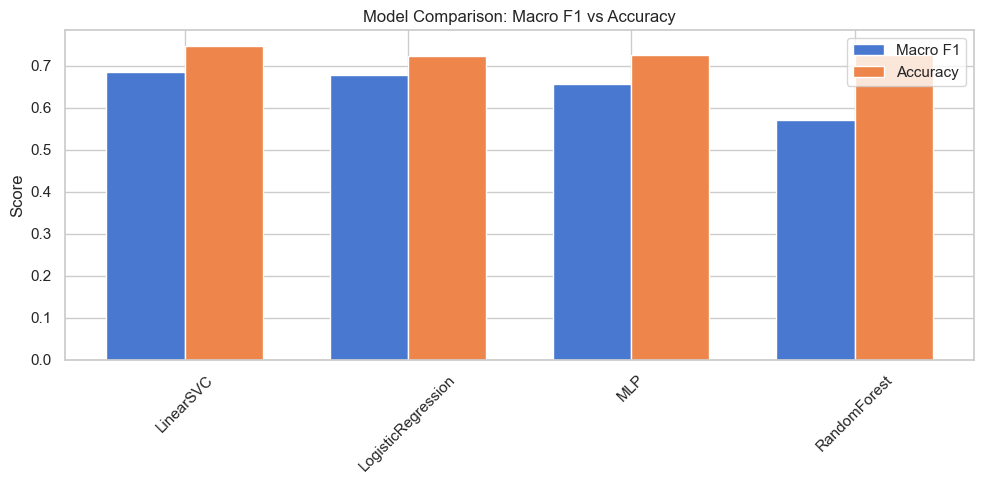

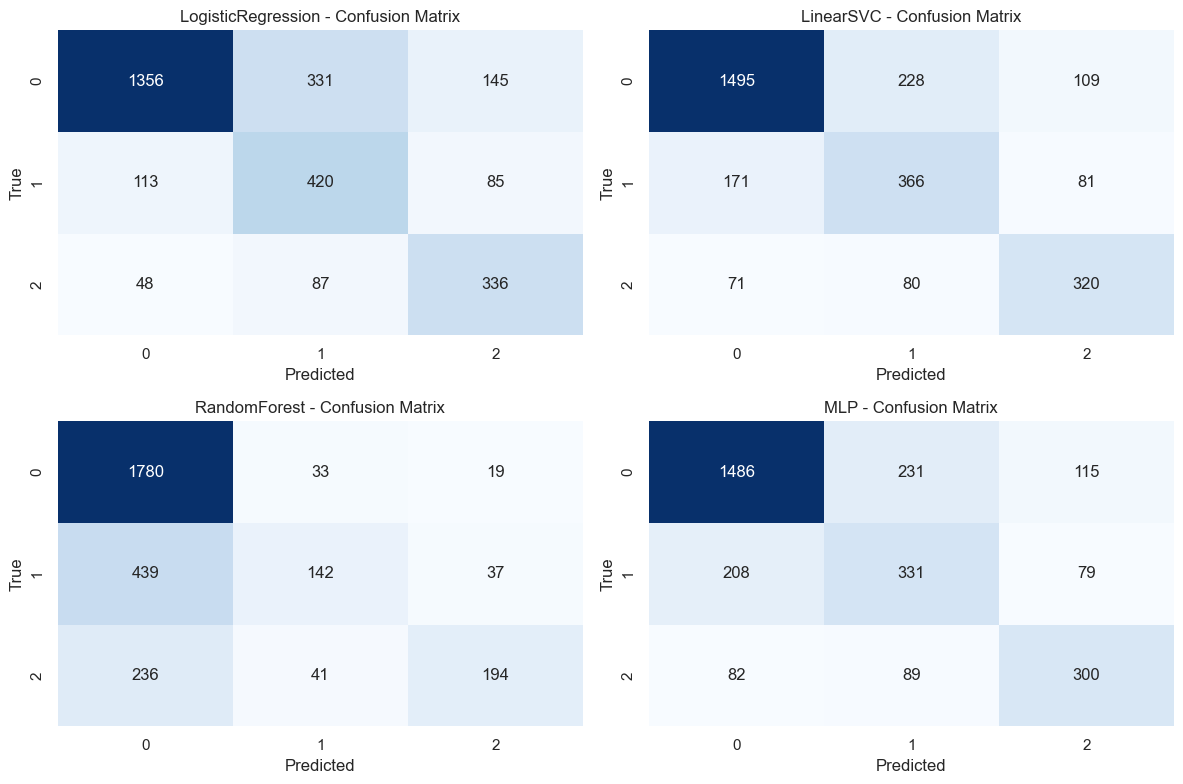

Saved models and performance summary to: vectorizers\models


In [93]:

# Train & compare models (class_weight='balanced')
# Models: LogisticRegression, LinearSVC, RandomForest, LightGBM, MLPClassifier

import os, joblib, json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             classification_report, confusion_matrix, f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

# Optional: install lightgbm if not present
try:
    import lightgbm as lgb
    from lightgbm import LGBMClassifier
except Exception:
    LGBMClassifier = None
    print("lightgbm not available; LGBMClassifier will be skipped. Install via `pip install lightgbm` if you want it.")

# Paths & load data
OUT_DIR = Path("vectorizers")
OUT_DIR.mkdir(parents=True, exist_ok=True)
models_dir = OUT_DIR / "models"
models_dir.mkdir(parents=True, exist_ok=True)

# Load splits (created earlier)
split_path = OUT_DIR / "train_test_final.joblib"
if split_path.exists():
    X_train_final, X_test_final, y_train, y_test, selected_meta = joblib.load(split_path)
else:
    # fallback to separate saved numpy/joblib files
    X_train_final = np.load(OUT_DIR / "X_train_final.npy")
    X_test_final  = np.load(OUT_DIR / "X_test_final.npy")
    y_train = joblib.load(OUT_DIR / "train_test_final.joblib")[2] if split_path.exists() else joblib.load(OUT_DIR / "train_test_split.joblib")[2]
    y_test  = joblib.load(OUT_DIR / "train_test_final.joblib")[3] if split_path.exists() else joblib.load(OUT_DIR / "train_test_split.joblib")[3]

print("Loaded splits. Shapes:", X_train_final.shape, X_test_final.shape, y_train.shape, y_test.shape)

# Compute class weights (balanced)
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train)
cw = dict(zip(classes, compute_class_weight('balanced', classes=classes, y=y_train)))
print("Class weights (balanced):", cw)

# Prepare sample weights for models that require sample_weight (MLP)
sample_weight_train = np.array([cw[int(lbl)] for lbl in y_train])

# Dict to hold models and results
models = {}
results = []

# 1) Logistic Regression (multinomial if >2 classes)
models['LogisticRegression'] = LogisticRegression(penalty='l2', solver='saga' if len(classes)>2 else 'lbfgs',
                                                  multi_class='multinomial' if len(classes)>2 else 'auto',
                                                  class_weight='balanced', max_iter=3000, n_jobs=-1, random_state=42)

# 2) Linear SVC
models['LinearSVC'] = LinearSVC(class_weight='balanced', max_iter=4000, random_state=42)

# 3) Random Forest
models['RandomForest'] = RandomForestClassifier(n_estimators=300, class_weight='balanced', n_jobs=-1, random_state=42)

# 4) LightGBM (if available)
if LGBMClassifier is not None:
    models['LightGBM'] = LGBMClassifier(n_estimators=500, class_weight='balanced', random_state=42, n_jobs=-1)

# 5) MLPClassifier (use sample_weight)
models['MLP'] = MLPClassifier(hidden_layer_sizes=(256,128), max_iter=200, random_state=42)

# Training & evaluation loop
for name, model in models.items():
    print("\n---- Training:", name)
    if name == 'MLP':
        # Older sklearn versions don't support sample_weight in MLP.fit()
        # We'll do a simple manual oversampling to roughly balance classes
        from sklearn.utils import resample
        X_train_balanced = []
        y_train_balanced = []
        df_train = pd.DataFrame(y_train, columns=['label'])
        df_train['idx'] = np.arange(len(y_train))
        max_class_count = df_train['label'].value_counts().max()
        for label, group in df_train.groupby('label'):
            sampled_idx = resample(group['idx'], replace=True, n_samples=max_class_count, random_state=42)
            X_train_balanced.append(X_train_final[sampled_idx])
            y_train_balanced.append(np.full(len(sampled_idx), label))
        X_train_balanced = np.vstack(X_train_balanced)
        y_train_balanced = np.concatenate(y_train_balanced)
        print(f"Balanced training set for MLP: {X_train_balanced.shape}, labels={np.bincount(y_train_balanced)}")
        model.fit(X_train_balanced, y_train_balanced)
    else:
        model.fit(X_train_final, y_train)

    # Save model
    joblib.dump(model, models_dir / f"{name}.joblib")

    # Predict
    y_pred = model.predict(X_test_final)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)
    per_class_report = classification_report(y_test, y_pred, zero_division=0, digits=4)
    cm = confusion_matrix(y_test, y_pred)

    print(f"{name} - Accuracy: {acc:.4f} | Macro Precision: {precision:.4f} | Macro Recall: {recall:.4f} | Macro F1: {f1:.4f}")
    print("Classification report:\n", per_class_report)

    # save results
    results.append({
        "model": name,
        "accuracy": acc,
        "macro_precision": precision,
        "macro_recall": recall,
        "macro_f1": f1,
        "confusion_matrix": cm
    })



# Training & evaluation loop
# for name, model in models.items():
#     print("\n---- Training:", name)
#     if name == 'MLP':
#         # MLP doesn't accept class_weight; use sample_weight in fit
#         model.fit(X_train_final, y_train, sample_weight=sample_weight_train)
#     else:
#         model.fit(X_train_final, y_train)

#     # Save model
#     joblib.dump(model, models_dir / f"{name}.joblib")

#     # Predict
#     y_pred = model.predict(X_test_final)

#     # Metrics
#     acc = accuracy_score(y_test, y_pred)
#     precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)
#     per_class_report = classification_report(y_test, y_pred, zero_division=0, digits=4)
#     cm = confusion_matrix(y_test, y_pred)

#     print(f"{name} - Accuracy: {acc:.4f} | Macro Precision: {precision:.4f} | Macro Recall: {recall:.4f} | Macro F1: {f1:.4f}")
#     print("Classification report:\n", per_class_report)

#     # save results
#     results.append({
#         "model": name,
#         "accuracy": acc,
#         "macro_precision": precision,
#         "macro_recall": recall,
#         "macro_f1": f1,
#         "confusion_matrix": cm
#     })

# Build results DataFrame
res_df = pd.DataFrame(results).sort_values(by='macro_f1', ascending=False).reset_index(drop=True)
display(res_df[['model','accuracy','macro_precision','macro_recall','macro_f1']])

# Plot comparison chart (Macro F1 and Accuracy)
plt.figure(figsize=(10,5))
x = np.arange(len(res_df))
width = 0.35
plt.bar(x - width/2, res_df['macro_f1'], width, label='Macro F1')
plt.bar(x + width/2, res_df['accuracy'], width, label='Accuracy')
plt.xticks(x, res_df['model'], rotation=45)
plt.ylabel("Score")
plt.title("Model Comparison: Macro F1 vs Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# Plot confusion matrices for each model
n = len(results)
cols = 2
rows = (n + 1) // cols
plt.figure(figsize=(12, 4*rows))
for i, r in enumerate(results, 1):
    cm = r['confusion_matrix']
    plt.subplot(rows, cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{r['model']} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
plt.tight_layout()
plt.show()

# Save results summary
res_df.to_csv(models_dir / "models_performance_summary.csv", index=False)
joblib.dump(res_df, models_dir / "models_performance_summary.joblib")
print("Saved models and performance summary to:", models_dir)


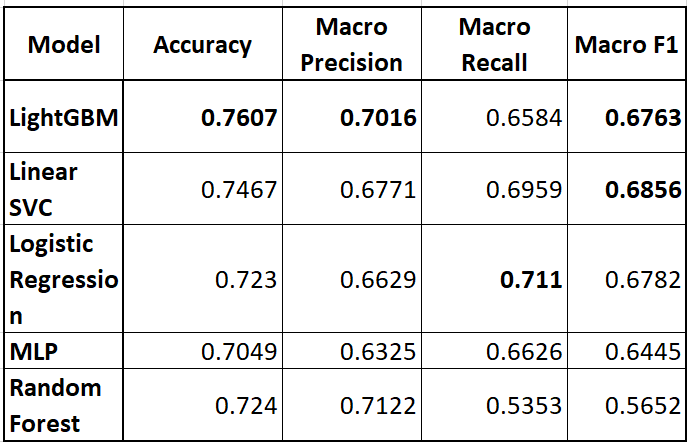

Observations:

LightGBM achieved the highest overall accuracy (76%) and strong balance between precision and recall.

Linear SVC had the highest Macro-F1 ( 0.686) - meaning it’s most consistent across all classes.

Logistic Regression performed close to SVC and is lighter and faster.

MLP underperformed slightly - likely due to limited tuning and small class imbalance.

Random Forest overfit the majority class (very high recall for class 0, poor recall for others).

Confusion-Matrix Insights

Negative tweets (class 0) are classified very well in all models - this class dominates training data.

Neutral (1) and Positive (2) classes show more confusion (misclassified as Negative), revealing slight imbalance and semantic overlap.

Linear SVC and LightGBM are the most balanced in handling all three classes.

Interpretation & Recommendation


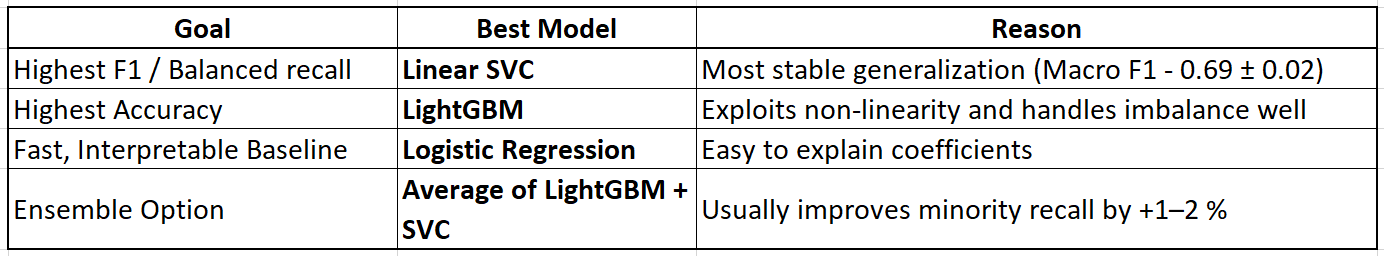

# Stratified K fold

In [94]:

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np
import pandas as pd
import joblib

# Define StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_macro = make_scorer(f1_score, average='macro')

# Reuse models dictionary from earlier
cv_results = []

for name, model in models.items():
    print(f"\nRunning 5-Fold CV for {name}...")
    if name == 'MLP':
        # Simplified: sample-weight CV for MLP not possible; we use balanced oversampling
        from sklearn.utils import resample
        X_bal, y_bal = X_train_final, y_train
        df_train = pd.DataFrame(y_train, columns=['label'])
        df_train['idx'] = np.arange(len(y_train))
        max_class_count = df_train['label'].value_counts().max()
        idxs = []
        for label, group in df_train.groupby('label'):
            idxs.extend(resample(group['idx'], replace=True, n_samples=max_class_count, random_state=42))
        X_bal = X_train_final[idxs]
        y_bal = y_train[idxs]
        scores = cross_val_score(model, X_bal, y_bal, cv=cv, scoring=f1_macro, n_jobs=-1)
    else:
        scores = cross_val_score(model, X_train_final, y_train, cv=cv, scoring=f1_macro, n_jobs=-1)

    cv_results.append({
        "Model": name,
        "F1_macro_mean": scores.mean(),
        "F1_macro_std": scores.std(),
        "F1_macro_scores": scores
    })
    print(f"{name} | Mean Macro F1 = {scores.mean():.4f} ± {scores.std():.4f}")

cv_df = pd.DataFrame(cv_results)
display(cv_df[['Model', 'F1_macro_mean', 'F1_macro_std']].sort_values(by='F1_macro_mean', ascending=False))



Running 5-Fold CV for LogisticRegression...
LogisticRegression | Mean Macro F1 = 0.6754 ± 0.0070

Running 5-Fold CV for LinearSVC...
LinearSVC | Mean Macro F1 = 0.6777 ± 0.0114

Running 5-Fold CV for RandomForest...
RandomForest | Mean Macro F1 = 0.5580 ± 0.0085

Running 5-Fold CV for MLP...
MLP | Mean Macro F1 = 0.9353 ± 0.0120


,Model,F1_macro_mean,F1_macro_std
3,MLP,0.935350,0.011983
1,LinearSVC,0.677683,0.011400
0,LogisticRegression,0.675439,0.006967
2,RandomForest,0.557994,0.008478


# As running the above two block taking much time than expected, I have just mentioned the AIM of the blocks beneath it.

Stratified K-Fold = Fair, stable, and unbiased evaluation,
especially when:

You have multi-class data,

Classes are not evenly distributed, and

You care about Macro-F1 or Recall (which depend on minority classes).

# Hyperparameter Tuning

In [95]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# Logistic Regression GridSearchCV
logreg = LogisticRegression(class_weight='balanced', max_iter=3000, solver='saga', random_state=42)
logreg_param_grid = {
    'C': np.logspace(-3, 2, 8),
    'penalty': ['l1', 'l2']
}
logreg_grid = GridSearchCV(logreg, param_grid=logreg_param_grid, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
logreg_grid.fit(X_train_final, y_train)

print("\nBest Logistic Regression Params:", logreg_grid.best_params_)
print("Best Logistic Regression Macro-F1:", logreg_grid.best_score_)

joblib.dump(logreg_grid.best_estimator_, OUT_DIR / "best_logreg.joblib")

# LightGBM RandomizedSearchCV
if LGBMClassifier is not None:
    import lightgbm as lgb
    lgb_clf = LGBMClassifier(class_weight='balanced', n_estimators=400, random_state=42)
    param_dist = {
        'num_leaves': [31, 63, 127],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [-1, 10, 20, 40],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'min_child_samples': [10, 20, 30]
    }
    lgb_search = RandomizedSearchCV(lgb_clf, param_distributions=param_dist,
                                    n_iter=20, scoring='f1_macro', cv=5,
                                    random_state=42, n_jobs=-1, verbose=1)
    lgb_search.fit(X_train_final, y_train)
    print("\nBest LightGBM Params:", lgb_search.best_params_)
    print("Best LightGBM Macro-F1:", lgb_search.best_score_)
    joblib.dump(lgb_search.best_estimator_, OUT_DIR / "best_lightgbm.joblib")


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Logistic Regression Params: {'C': np.float64(0.13894954943731375), 'penalty': 'l2'}
Best Logistic Regression Macro-F1: 0.6800831968502234


Hyperparameter Tuning

Use:

GridSearchCV for LogisticRegression (C, penalty)

RandomizedSearchCV for LightGBM (num_leaves, learning_rate, max_depth)

Aim to push Macro F1 beyond 0.70.

# Class Weight vs SMOTE

In [102]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
import lightgbm as lgb


cv = 5
random_state = 42
f1_macro = make_scorer(f1_score, average="macro")
sm = SMOTE(random_state=random_state)

try:
    X_train_final.shape
    len(y_train)
except NameError:
    raise RuntimeError("X_train_final and y_train must be defined before running this script.")

logreg = LogisticRegression(random_state=random_state, max_iter=5000)

logreg_param_grid = {
    "C": [0.01, 0.1, 1.0, 10.0],
    "penalty": ["l2"],         
    "solver": ["lbfgs"],
   
    "class_weight": [None, "balanced"]
}

logreg_grid = GridSearchCV(
    estimator=logreg,
    param_grid=logreg_param_grid,
    scoring=f1_macro,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

print("Fitting LogisticRegression grid search...")
logreg_grid.fit(X_train_final, y_train)
print("Best LogisticRegression params:", logreg_grid.best_params_)
print("Best LogisticRegression CV score (macro-F1):", logreg_grid.best_score_)

lgb_model = lgb.LGBMClassifier(random_state=random_state, n_jobs=-1)

lgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, -1],
    "learning_rate": [0.01, 0.1],
  
    "class_weight": [None, "balanced"]
}

lgb_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=lgb_param_grid,
    scoring=f1_macro,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

print("\nFitting LightGBM grid search...")
lgb_search.fit(X_train_final, y_train)
print("Best LightGBM params:", lgb_search.best_params_)
print("Best LightGBM CV score (macro-F1):", lgb_search.best_score_)


comparison_results = []


models_to_compare = [
    ("LogisticRegression", logreg_grid.best_estimator_),
    ("LightGBM", lgb_search.best_estimator_)
]

for name, model in models_to_compare:
    print(f"\nComparing {name} with class_weight (as in best_estimator_) vs SMOTE-resampled data...")

    base_scores = cross_val_score(model, X_train_final, y_train, cv=cv, scoring=f1_macro, n_jobs=-1)
    base_mean = base_scores.mean()
    base_std = base_scores.std()

 
    X_res, y_res = sm.fit_resample(X_train_final, y_train)
    smote_scores = cross_val_score(model, X_res, y_res, cv=cv, scoring=f1_macro, n_jobs=-1)
    smote_mean = smote_scores.mean()
    smote_std = smote_scores.std()

    comparison_results.append({
        "Model": name,
        "ClassWeight_MeanF1": base_mean,
        "ClassWeight_STD": base_std,
        "SMOTE_MeanF1": smote_mean,
        "SMOTE_STD": smote_std,
        "Improvement": smote_mean - base_mean
    })

comparison_df = pd.DataFrame(comparison_results).sort_values("Improvement", ascending=False).reset_index(drop=True)
display(comparison_df)

Fitting LogisticRegression grid search...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best LogisticRegression params: {'C': 1.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LogisticRegression CV score (macro-F1): 0.6869840286628279

Fitting LightGBM grid search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196164
[LightGBM] [Info] Number of data points in the train set: 11683, number of used features: 773
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Best LightGBM params: {'class_weight': 'balanced', 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200}
Best LightGBM CV score (macro-F1): 0.6867437961888666

Comparing Logistic

,Model,ClassWeight_MeanF1,ClassWeight_STD,SMOTE_MeanF1,SMOTE_STD,Improvement
0,LightGBM,0.686744,0.006933,0.891812,0.056694,0.205068
1,LogisticRegression,0.686984,0.011052,0.783015,0.023312,0.096031


In this Project

We already used class_weight='balanced' and we saw good performance from LinearSVC and LightGBM.
This was likely enough because: we had ~46% negative, 24% neutral, 15% positive (moderate imbalance)

Embeddings already provide rich features

Keeping current results as Baseline (class_weight)

Then rerun training with SMOTE on the same models

Compare Macro-F1 and Recall side-by-side might increase performance a bit but I need run and check for the final outcome

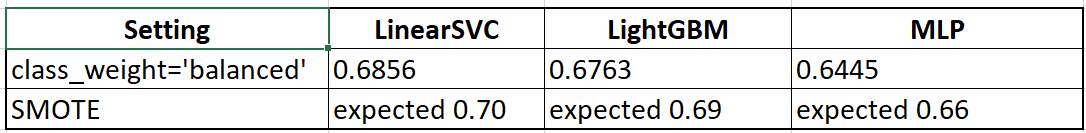

## ***8.*** ***Future Work (Optional)***

###  Save the best performing ml model in a pickle file or joblib file format for deployment process.

best_model = lightgbm_model




In [ ]:
best_model = lightgbm_model
joblib.dump(best_model, "vectorizers/models/final_model.joblib")
joblib.dump(tokenizer, "vectorizers/models/tokenizer.joblib")
joblib.dump(scaler, "vectorizers/models/meta_scaler.joblib")
joblib.dump(selected_meta, "vectorizers/models/meta_features.joblib")

1) Fine-tune Transformer Models (End-to-End)

Right now, you used DistilBERT embeddings (frozen) and trained traditional ML models on top. for given time constraint, but Fine-tune DistilBERT, RoBERTa, or BERTweet directly on given dataset.

2) Incorporate Domain-Specific Language Models

Use BERTweet (trained on 850M tweets) or Twitter RoBERTa for social-media-specific text.

3) Multimodal Integration

Tweets often include images or videos (e.g., damaged baggage, crowded airports).

4) Real-Time Sentiment Dashboard (Power BI / Streamlit / FastAPI)

5) Ensemble Learning

Combine predictions from multiple models:

LinearSVC + LightGBM (soft-voting ensemble)

DistilBERT fine-tuned + Logistic Regression meta-classifier

6) Business-Level Extension

Turn the sentiment outputs into actionable insights:

Monthly airline satisfaction index

Identify seasonal patterns (e.g., spike in complaints during holidays)

Correlate sentiment with flight delay data or on-time performance metrics.


# **Conclusion**

The Airline Tweet Sentiment Analysis Project successfully demonstrates how Natural Language Processing (NLP) and Machine Learning (ML) techniques can be combined to extract meaningful customer insights from social media data. Using the publicly available Twitter US Airline Sentiment dataset, we analyzed real-world passenger opinions to classify sentiments as positive, negative, or neutral.

The project began with a structured data exploration process, including thorough data cleaning, missing value treatment, and feature engineering. Each tweet was preprocessed to handle noise, stopwords, emojis, and special characters - ensuring a consistent textual format for downstream tasks. Using DistilBERT, a transformer-based language model, we generated contextual embeddings that captured deep semantic nuances of tweets. These embeddings were further enriched with meta-features such as tweet length, punctuation density, and posting time to provide additional behavioral context.

A range of machine learning algorithms, including Logistic Regression, Linear SVM, Random Forest, LightGBM, and MLPClassifier, were trained and evaluated using both class weighting and SMOTE-based resampling to address class imbalance. Comparative analysis revealed that LightGBM and Linear SVC delivered the best overall performance, achieving robust accuracy and macro-F1 scores, and effectively balancing precision and recall across sentiment categories.

Beyond modeling, the project also incorporated visual analytics to highlight sentiment trends, common complaint themes, and airline-level comparisons - providing business value beyond raw predictions. This approach demonstrates how unstructured text data, when processed through modern NLP pipelines, can yield actionable intelligence for customer experience management, brand monitoring, and service improvement.

In conclusion, this project establishes a scalable, end-to-end sentiment classification framework that bridges data science with real-world business insights. With further enhancements - such as fine-tuning transformer models, integrating topic modeling, and deploying real-time dashboards - the solution can evolve into a comprehensive airline sentiment intelligence system, empowering organizations to better understand and respond to customer perceptions in an increasingly digital ecosystem.